In [ ]:

#@title Install Libraries { display-mode: "form" }
#!rm -rf synthpops
!git clone https://github.com/InstituteforDiseaseModeling/synthpops.git
!pip install -e synthpops
!pip install torch_geometric
!pip install captum

In [1]:
from IPython.display import display, HTML

#@title Drive Mount { display-mode: "form" }
from google.colab import drive
drive.mount('/content/drive', force_remount = True)


# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))

Mounted at /content/drive


In [18]:
#@title Select Graph Model Type { display-mode: "form" }
model_type = "Synthpops" #@param ["Erdos-Renyi", "Stochastic Block Model", "Random Geometric", "Barabasi-Albert", "Watts-Strogatz", "Real", "Synthpops"]


net = 'ER'
if model_type == 'Stochastic Block Model':
   net = 'SBM'
elif model_type == 'Barabasi-Albert':
   net = 'BA'
elif model_type == 'Random Geometric':
   net = 'RG'
elif model_type == 'Watts-Strogatz':
   net = 'WS'
elif model_type == 'Erdos-Renyi':
   net = 'ER'
elif model_type == 'Real':
   net = 'Real'
elif model_type == "Synthpops":
   net = "Synthpops"

# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))


In [19]:
#@title Main folder { display-mode: "form" }

import os

save_path = "/content/drive/MyDrive/Gryffindor/ExDiff/BMC/SIRVD_ex_real/Results" #@param {type:"string"}
if not os.path.exists(save_path):
    os.makedirs(save_path)

#@markdown Set main folder in which save files


sep = os.sep

save_path = save_path + sep + net + sep
if not os.path.exists(save_path):
    os.makedirs(save_path)
print("Save path: ", save_path)


%cd $save_path
cwd = os.getcwd()

# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))

Save path:  /content/drive/MyDrive/Gryffindor/ExDiff/BMC/SIRVD_ex_real/Results/Synthpops/
/content/drive/.shortcut-targets-by-id/1EDBpor4xb5uj9xm8-hNU7mHaFEYEaip9/Gryffindor/ExDiff/BMC/SIRVD_ex_real/Results/Synthpops


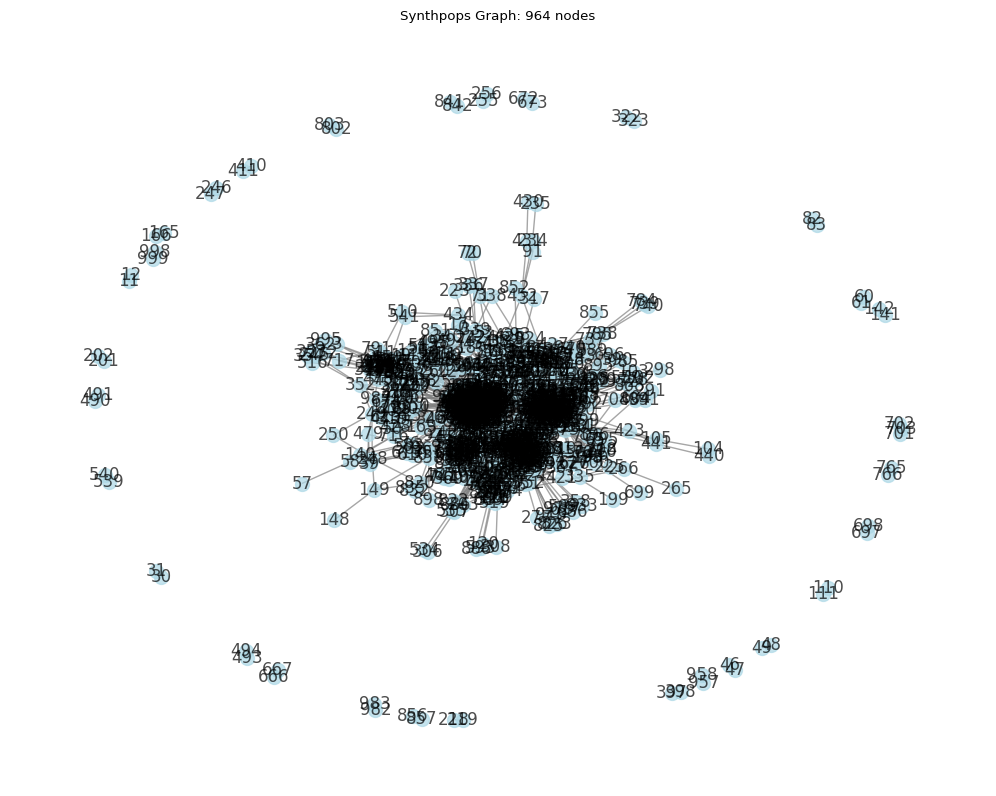

Number of nodes: 964
Number of edges: 7318
Average clustering coefficient: 0.3593
Graph is not connected - cannot compute average shortest path length


In [20]:
from synthpops import Pop
import logging
import pandas as pd
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)


def create_synthpops(n):
  pop = Pop(n, rand_seed=42)
  #pop.plot_contacts() # plot the contact matrix
  #plt.show() # display contact matrix to screen
  people = pop.to_people()
  layers = ["h", "s", "w", "c", "l"]
  list_of_contacts = []
  for l in layers:
    to_df = people.contacts[l].to_df()
    list_of_contacts.append(to_df)

  df = pd.concat(list_of_contacts)
  df.to_csv(f"synthpops_{n}.csv")

  G = nx.from_pandas_edgelist(df, "p1", "p2")
  return G

def extract_edges(day = 0):
    df_day = df[df["day"] == day]
    edges = list(zip(df_day["id1"], df_day["id2"]))
    return edges

def build_contact_graph(day=0):
    edges = extract_edges(day)
    G = nx.Graph()
    G.add_edges_from(edges)
    return G

#@title Configure and Generate Graph { display-mode: "form" }

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML

# Access model_type from previous cell
selected_model = model_type

#@markdown ## Common Parameters
num_nodes = 1000 #@param {type:"slider", min:10, max:10000, step:10}
seed = 42 #@param {type:"integer"}
show_labels = True #@param {type:"boolean"}

#@markdown ## Erdös-Rényi Parameters
probability = 0.03  #@param {type:"slider", min:0.01, max:1.0, step:0.01}
directed = False #@param {type:"boolean"}
#0.1

#@markdown ## Stochastic Block Model Parameters
num_communities = 4  #@param {type:"slider", min:2, max:6, step:1}
#3
community_sizes = "250, 250, 250, 250" #@param {type:"string"}
#"200, 100"
within_community_probability = 0.15  #@param {type:"slider", min:0.01, max:1.0, step:0.01}
#0.39
between_community_probability = 0.02 #@param {type:"slider", min:0.001, max:0.5, step:0.001}
#0.138


#@markdown ## Random Geometric Parameters
radius = 0.15 #@param {type:"slider", min:0.05, max:0.5, step:0.01}
#0.25
dimensions = 2 #@param {type:"slider", min:2, max:3, step:1}


#@markdown ## Barabási-Albert Parameters
m_new_edges = 4 #@param {type:"slider", min:1, max:10, step:1}
#2

#@markdown ## Watts-Strogatz Parameters
n_nearest_neighbors = 10 #@param {type:"slider", min:2, max:10, step:1}
#6
rewiring_probability = 0.06 #@param {type:"slider", min:0.01, max:1.0, step:0.01}

# Use JavaScript to hide irrelevant parameter sections based on the model type
display(HTML(f'''
<script>
// Use the selected model from Python
var selectedModel = "{selected_model}";

// Function to hide irrelevant parameter sections
function hideIrrelevantParameters() {{
    var formGroups = document.querySelectorAll('.form-group');

    for (var i = 0; i < formGroups.length; i++) {{
        var text = formGroups[i].innerText || '';

        // Keep common parameters visible
        if (text.includes('Common Parameters')) {{
            continue;
        }}


        // Hide/show based on model type
        if (selectedModel === "Erdos-Renyi") {{
          if (text.includes('Stochastic Block Model Parameters') ||
                text.includes('Random Geometric Parameters') ||
                text.includes('Barabasi–Albert Parameters') ||
                text.includes('Watts–Strogatz Parameters')) {{
                formGroups[i].style.display = 'none';
            }}

        }} else if (selectedModel === "Stochastic Block Model") {{
            if (text.includes('Erdos-Renyi Parameters') ||
                text.includes('Random Geometric Parameters') ||
                text.includes('Barabasi–Albert Parameters') ||
                text.includes('Watts–Strogatz Parameters')) {{
                formGroups[i].style.display = 'none';
            }}
        }} else if (selectedModel === "Random Geometric") {{
            if (text.includes('Erdos-Renyi Parameters') ||
                text.includes('Stochastic Block Model Parameters') ||
                text.includes('Barabasi-Albert Parameters') ||
                text.includes('Watts-Strogatz Parameters')) {{
                formGroups[i].style.display = 'none';
            }}
        }} else if (selectedModel === "Barabási-Albert") {{
            if (text.includes('Erdos-Renyi Parameters') ||
                text.includes('Stochastic Block Model Parameters') ||
                text.includes('Random Geometric Parameters') ||
                text.includes('Watts–Strogatz Parameters')) {{
                formGroups[i].style.display = 'none';
            }}
        }} else if (selectedModel === "Watts-Strogatz") {{
            if (text.includes('Erdös-Rényi Parameters') ||
                text.includes('Stochastic Block Model Parameters') ||
                text.includes('Random Geometric Parameters') ||
                text.includes('Barabasi-Albert Parameters')) {{
                formGroups[i].style.display = 'none';

            }}
        }}
    }}
}}
// Run after a short delay to ensure the DOM is fully loaded
setTimeout(hideIrrelevantParameters, 500);
</script>
'''))

# Create the appropriate graph based on the model type
if selected_model == "Erdos-Renyi":
    # Create Erdös-Rényi graph
    G = nx.erdos_renyi_graph(n=num_nodes, p=probability, seed=seed, directed=directed)
    title = f"Erdös-Rényi Graph: {num_nodes} nodes, p={probability}"
    pos = nx.spring_layout(G, seed=seed)

elif selected_model == "Stochastic Block Model":
    # Process community sizes
    try:
        sizes = [int(s.strip()) for s in community_sizes.split(",")]
        if len(sizes) != num_communities:
            sizes = [num_nodes // num_communities] * num_communities
    except:
        sizes = [num_nodes // num_communities] * num_communities

    # Ensure sizes sum to num_nodes
    total = sum(sizes)
    if total != num_nodes:
        sizes[-1] += (num_nodes - total)

    # Create probability matrix
    p = [[between_community_probability for _ in range(num_communities)] for _ in range(num_communities)]
    for i in range(num_communities):
        p[i][i] = within_community_probability

    # Create the graph
    G = nx.stochastic_block_model(sizes, p, seed=seed)
    title = f"Stochastic Block Model: {num_communities} communities with {sizes} nodes"
    pos = nx.spring_layout(G, seed=seed)

elif selected_model == "Barabasi-Albert":
    G = nx.barabasi_albert_graph(n=num_nodes, m=m_new_edges, seed=seed)
    title = f"Barabasi-Albert Graph: {num_nodes} nodes, m={m_new_edges}"
    pos = nx.spring_layout(G, seed=seed)

elif selected_model == "Watts-Strogatz":
    G = nx.watts_strogatz_graph(n=num_nodes, k=n_nearest_neighbors, p=rewiring_probability, seed=seed)
    title = f"Watts-Strogatz Graph: {num_nodes} nodes, k={n_nearest_neighbors}, p={rewiring_probability}"
    pos = nx.spring_layout(G, seed=seed)

elif selected_model == "Random Geometric":  # Random Geometric
    # Create Random Geometric graph
    G = nx.random_geometric_graph(n=num_nodes, radius=radius, dim=dimensions, seed=seed)
    title = f"Random Geometric Graph: {num_nodes} nodes, radius={radius}, dim={dimensions}"
    pos = nx.get_node_attributes(G, 'pos')

elif selected_model == "Real":
    #df = pd.read_csv(save_path + sep + "tnet_malawi_pilot2.csv", index_col=0)
    df = pd.read_csv("/content/drive/MyDrive/Gryffindor/ExDiff/BMC/SIRVD_ex_real/tnet_malawi_pilot2.csv", index_col=0)

    df = df.sort_values(by="day", ascending=True)
    days = df["day"].unique()
    Gs = {int(day): build_contact_graph(day) for day in days}
    num_edges = {day: G.number_of_edges() for day, G in Gs.items()}
    key = max(num_edges, key=num_edges.get)
    G = Gs[key]
    print(f"Selected day {key} with {G.number_of_edges()} interactions.")
    pos = nx.spring_layout(G, seed=seed)
    title = f"Real Graph: {G.number_of_nodes()} nodes"

elif selected_model == "Synthpops":
    G = create_synthpops(num_nodes)
    title = f"Synthpops Graph: {G.number_of_nodes()} nodes"
    pos = nx.spring_layout(G, seed=seed)

# Draw the graph
fig = plt.figure(figsize=(10, 8))
plt.title(title)

# Add community colors for Stochastic Block Model
if selected_model == "Stochastic Block Model":
    # Get node communities from graph
    communities = [data['block'] for _, data in G.nodes(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color=communities, cmap=plt.cm.tab10, node_size=100)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
elif selected_model == "Barabasi–Albert" or selected_model == "Watts–Strogatz":
    nx.draw(G, pos, with_labels=show_labels, node_size=100, node_color='lightcoral',
            edge_color='gray', alpha=0.7)
else:
    nx.draw(G, pos, with_labels=show_labels, node_size=100, node_color='lightblue',
            edge_color='gray', alpha=0.7)

plt.axis('off')
plt.tight_layout()
plt.show()

# Show graph statistics
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average clustering coefficient: {round(nx.average_clustering(G), 4)}")
try:
    if nx.is_connected(G):
        print(f"Average shortest path length: {round(nx.average_shortest_path_length(G), 4)}")
    else:
        print("Graph is not connected - cannot compute average shortest path length")
except:
    print("Could not compute average shortest path length (possibly directed graph)")

# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))

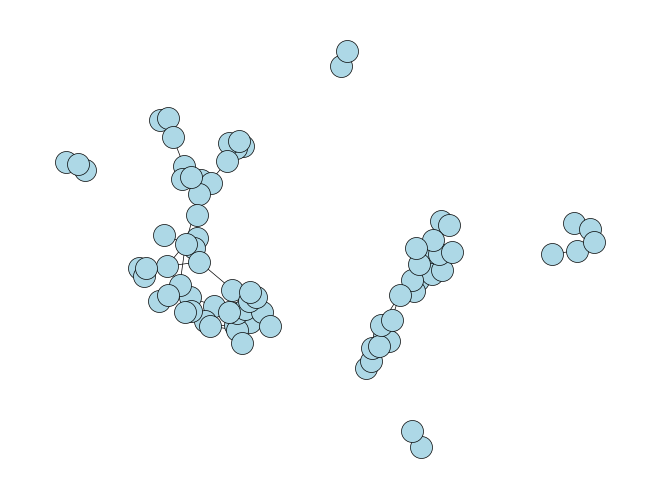

In [ ]:
#@title Save Graph { display-mode: "form" }

def sanitize_graph_for_graphml(G):
    import json

    for _, data in G.nodes(data=True):
        for key, value in list(data.items()):
            if isinstance(value, list):
                data[key] = ",".join(map(str, value))
            elif isinstance(value, dict):
                data[key] = json.dumps(value)

    for _, _, attrs in G.edges(data=True):
        for key, value in list(attrs.items()):
            if isinstance(value, list):
                attrs[key] = ",".join(map(str, value))
            elif isinstance(value, dict):
                attrs[key] = json.dumps(value)

    return G

def save_graph(G, save_path):
    import networkx as nx
    import matplotlib.pyplot as plt


    #G = nx.read_graphml(file_path)

    pos = nx.spring_layout(G, seed=seed)
    pastel_blue = '#ADD8E6'
    node_size = 250

    nx.draw(
        G,
        pos,
        with_labels=False,
        node_color=pastel_blue,
        edge_color='black',
        node_size=node_size,
        width=0.5,
        edgecolors='black',
        linewidths=0.5
    )


    plt.savefig(save_path, format='pdf', dpi=600)
    plt.show()


#@markdown ###Paths to save graphml format and figure
name_graphml = f"{net}_graph.graphml" #@param {type:"string"}
G = sanitize_graph_for_graphml(G)
nx.write_graphml(G, os.path.join(cwd, name_graphml))
name_figure = f"{net}_graph.pdf" #@param {type:"string"}
save_graph(G, os.path.join(cwd, name_figure))



import json

#@markdown ###Paths to save graph informations in json file
name_json = f"{net}_info.json" #@param {type:"string"}


stats = {
    "Number of nodes": G.number_of_nodes(),
    "Number of edges": G.number_of_edges(),
    "Average clustering coefficient": round(nx.average_clustering(G), 4)
}

try:
    if nx.is_connected(G):
        stats["Average shortest path length"] = round(nx.average_shortest_path_length(G), 4)
    else:
        stats["Average shortest path length"] = "Graph not connected"
except:
    stats["Average shortest path length"] = "Error (possibly directed graph)"




model_params = {
    "Erdos-Renyi": {
        "p": probability,
        "directed": directed
    },
    "Stochastic Block Model": {
        "num_communities": num_communities,
        "community_sizes": community_sizes,
        "within_community_probability": within_community_probability,
        "between_community_probability": between_community_probability
    },
    "Barabasi-Albert": {
        "m_new_edge": m_new_edges
    },
    "Watts-Strogatz": {
        "n_nearest_neighbors": n_nearest_neighbors,
        "rewiring_probability": rewiring_probability
    },
    "Random Geometric": {
        "radius": radius,
        "dimensions": dimensions
    },
    "Real": {
        "num_nodes": G.number_of_nodes(),
        "num_edges": G.number_of_edges()
    },
    "Synthpops": {
        "num_nodes": G.number_of_nodes(),
        "num_edges": G.number_of_edges()
    }

}

output = {
    "Graph type": selected_model,
    "Model parameters": model_params[selected_model]
}

with open(os.path.join(cwd, name_json), "w") as f:
    json.dump(output, f, indent=4)



# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))

In [21]:
#@title SIRVD Model Parameters { display-mode: "form" }
#@markdown ## Configure SIRVD Model Parameters

import json

select_parameter_set = "Measeles" #@param ["Early Stage COVID-19 Italy", "Late Stage COVID-19 Italy", "Measeles", "User Input"]
parameter_sets = {
    "Early Stage COVID-19 Italy": {
        "MU_H": 0.011,
        "BETA_H": 0.123,
        "BETA_HV": 0,
        "GAMMA_H": 0.018,
        "DELTA_H": 0.014
    },
    "Late Stage COVID-19 Italy": {
        "MU_H": 0.011,
        "BETA_H": 0.012,
        "BETA_HV": 0,
        "GAMMA_H": 0.038,
        "DELTA_H": 0.002
    },
    "Measeles": {
        "MU_H": 0, #0.011,
        "BETA_H": 0.8394,
        "BETA_HV": 0,
        "GAMMA_H": 0.4419,
        "DELTA_H": 0.0010
    },
}

#@markdown ## User Input
#@markdown ### Mortality and Vaccination Parameters
MU_H = 0.011 #@param {type:"slider", min:0.0, max:0.05, step:0.00001}
#@markdown Natural human mortality rate

RV_H = 0.05 #@param {type:"slider", min:0.0, max:1.0, step:0.0005}
#@markdown Probability of random vaccination

BV_H = 0.2 #@param {type:"slider", min:0.0, max:1.0, step:0.0005}
#@markdown Probability of targeted vaccination

NV_H = 0 #@param {type:"slider", min:0.0, max:0.01, step:0}
#@markdown No vaccination

#@markdown ### Infection Parameters
BETA_H = 0.123 #@param {type:"slider", min:0.0, max:0.5, step:0.00005}
#@markdown Probability of infection

BETA_HV = 0.0123 #@param {type:"slider", min:0.0, max:0.1, step:0.00005}
#@markdown Probability of becoming infected for a vaccinated individual

GAMMA_H = 0.018 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
#@markdown Probability of recovery

DELTA_H = 0.014 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
#@markdown Mortality rate for infected individuals

N_SIMS = 5 #@param {type:"slider", min:1, max:20, step:1}
#@markdown Number of simulations

name_params_json = f"{net}_params_SIRVD.json" #@param {type:"string"}
#@markdown Path to save in a json file the parameters

name_params_json = f"{net}_params_SIRVD.json" #@param {type:"string"}
#@markdown Path to save in a json file the parameters

# Store parameters in a dictionary
if select_parameter_set == "User Input":
    params = {
        "MU_H": MU_H,
        "V_H": NV_H,
        "BETA_H": BETA_H,
        "BETA_HV": BETA_HV,
        "GAMMA_H": GAMMA_H,
        "DELTA_H": DELTA_H
    }
else:
    params = parameter_sets[select_parameter_set]
    params["V_H"] = 0.0

params_vax = params.copy()
params_vax["V_H"] = RV_H

params_vax_target = params.copy()
params_vax_target["V_H"] = BV_H

sim_params = {
    "no_vax": params,
    "vax": params_vax,
    "vax_target": params_vax_target,
    "vax_percolation": params_vax_target,
}

# Display the current parameter values in a formatted way
from IPython.display import display, HTML, Markdown

# Create a summary table of the parameters
parameters_summary = """
| Parameter | Value | Description |
|-----------|-------|-------------|
| MU_H | {:.5f} | Natural human mortality |
| V_H_r | {:.4f} | Probability of random vaccination |
| V_H_t | {:.4f} | Probability of tageted vaccination |
| V_H_no | {:.2f} | No vaccination |
| BETA_H | {:.6f} | Probability of becoming infected when susceptible |
| BETA_HV | {:.6f} | Probability of becoming infected for a vaccinated individual |
| GAMMA_H | {:.5f} | Probability of recovery |
| DELTA_H | {:.5f} | Mortality rate for infected individuals |
| N_SIMS | {} | Number of simulations |
""".format(params['MU_H'], params_vax['V_H'], params_vax_target['V_H'], params["V_H"],
           params['BETA_H'], params['BETA_HV'], params['GAMMA_H'], params['DELTA_H'], N_SIMS)

display(Markdown(parameters_summary))


with open(os.path.join(cwd, name_params_json), "w") as f:
    json.dump(sim_params, f, indent=4)

# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))



| Parameter | Value | Description |
|-----------|-------|-------------|
| MU_H | 0.00000 | Natural human mortality |
| V_H_r | 0.0500 | Probability of random vaccination |
| V_H_t | 0.2000 | Probability of tageted vaccination |
| V_H_no | 0.00 | No vaccination |
| BETA_H | 0.839400 | Probability of becoming infected when susceptible |
| BETA_HV | 0.000000 | Probability of becoming infected for a vaccinated individual |
| GAMMA_H | 0.44190 | Probability of recovery |
| DELTA_H | 0.00100 | Mortality rate for infected individuals |
| N_SIMS | 5 | Number of simulations |


no_vax


/tmp/ipython-input-1598963209.py:229: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  self._cmap = plt.cm.get_cmap('tab20') # Matplotlib colormap for node color coding


 Step 0: {'Sh': 868, 'Ih': 96, 'Rh': 0, 'Vh': 0, 'Dh': 0}

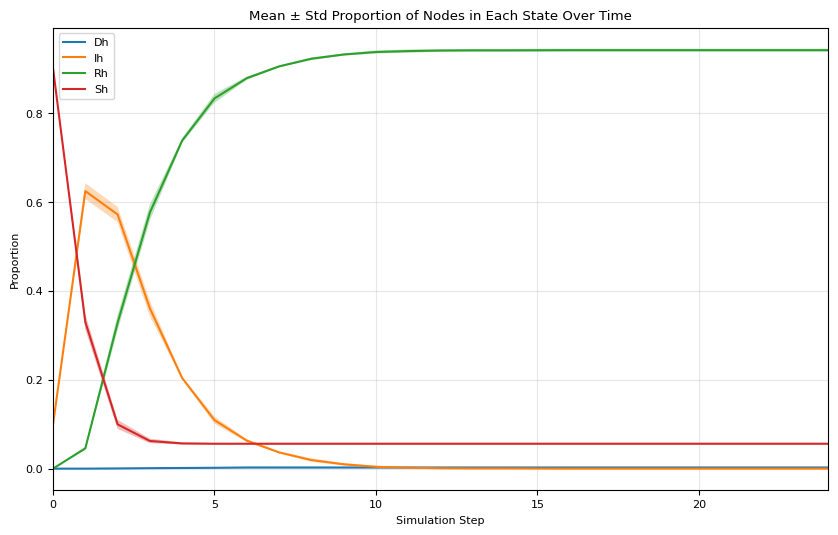

vax


/tmp/ipython-input-1598963209.py:229: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  self._cmap = plt.cm.get_cmap('tab20') # Matplotlib colormap for node color coding


 Step 0: {'Sh': 868, 'Ih': 96, 'Rh': 0, 'Vh': 0, 'Dh': 0}

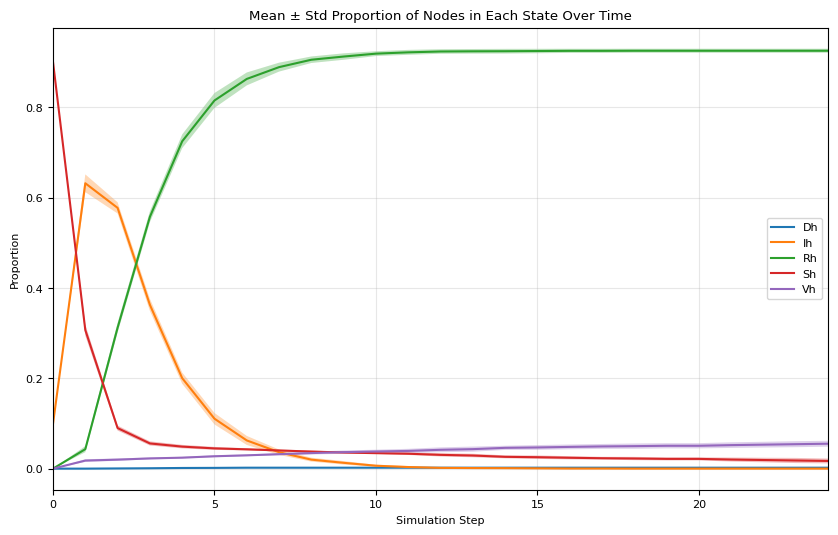

vax_target


/tmp/ipython-input-1598963209.py:229: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  self._cmap = plt.cm.get_cmap('tab20') # Matplotlib colormap for node color coding


 Step 0: {'Sh': 868, 'Ih': 96, 'Rh': 0, 'Vh': 0, 'Dh': 0}

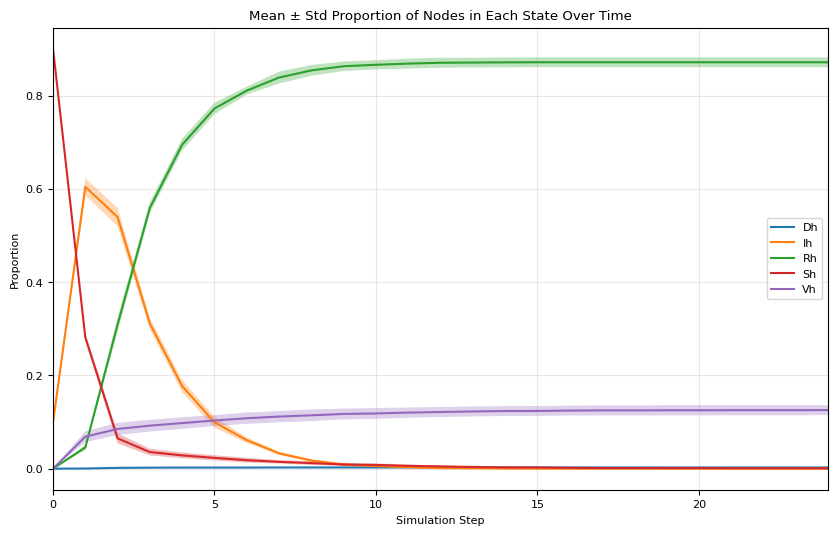

vax_percolation


/tmp/ipython-input-1598963209.py:229: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  self._cmap = plt.cm.get_cmap('tab20') # Matplotlib colormap for node color coding


 Step 0: {'Sh': 868, 'Ih': 96, 'Rh': 0, 'Vh': 0, 'Dh': 0}

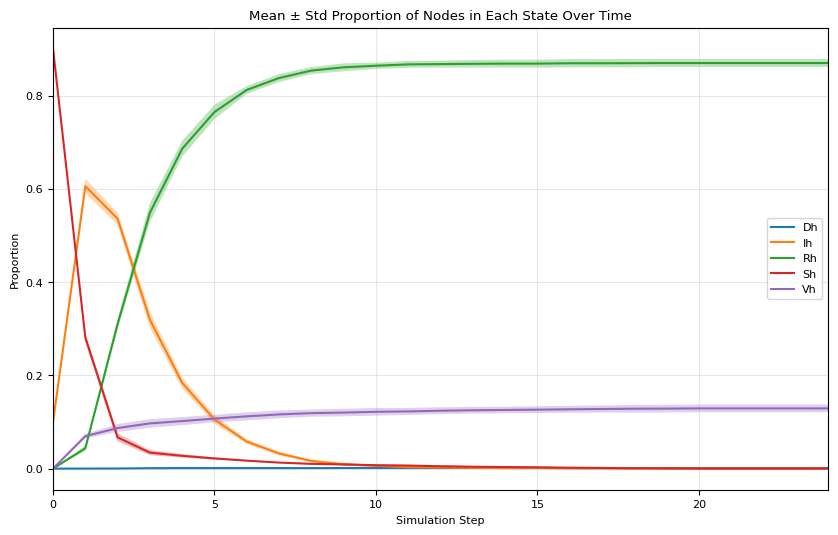

In [22]:
#@title SIRVD simulations { display-mode: "form" }

from collections import Counter
from operator import itemgetter
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

def plot_multi_run_proportions(sims, min_step=None, max_step=None, labels=None, **kwargs):
    """
    Plot mean ± std proportion of nodes in each state over simulation steps across multiple runs.

    Args:
        data: dict of runs -> list/dict of sims
        min_step: int, first step to include
        max_step: int, last step to include (non-inclusive)
        labels: list of states to plot (defaults to all states observed)
        kwargs: extra plt.plot kwargs

    Returns:
        Matplotlib Figure object.
    """

    data = {i: sim._states for i, sim in sims.items()}
    runs = len(data)
    steps_all = list(next(iter(data.values())).keys() if isinstance(next(iter(data.values())), dict) else range(len(next(iter(data.values())))))
    min_step = min_step or 0
    max_step = max_step or len(steps_all)
    steps = steps_all[min_step:max_step]

    # Collect proportions per run, per state, per step
    # proportions[state] = np array shape (runs, len(steps))
    all_states = set()
    for run_data in data.values():
        for step in steps:
            count = Counter(run_data[step]) if isinstance(run_data[step], list) else Counter(run_data[step].values())
            all_states.update(count.keys())
    if labels is None:
        labels = sorted(all_states)

    proportions = {state: np.zeros((runs, len(steps))) for state in labels}

    for i, run_data in enumerate(data.values()):
        for j, step in enumerate(steps):
            count = Counter(run_data[step]) if isinstance(run_data[step], list) else Counter(run_data[step].values())
            total = sum(count.values())
            for state in labels:
                proportions[state][i, j] = count.get(state, 0) / total if total > 0 else 0

    # Calculate mean and std
    mean_prop = {state: proportions[state].mean(axis=0) for state in labels}
    std_prop = {state: proportions[state].std(axis=0) for state in labels}

    fig = plt.figure(figsize=(10,6))

    for state in labels:
        plt.plot(steps, mean_prop[state], label=state, **kwargs)
        plt.fill_between(steps,
                         mean_prop[state] - std_prop[state],
                         mean_prop[state] + std_prop[state],
                         alpha=0.3)

    plt.title('Mean ± Std Proportion of Nodes in Each State Over Time')
    plt.xlabel('Simulation Step')
    plt.ylabel('Proportion')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(steps[0], steps[-1])

    return fig


def initial_state(G):

    state = {}

    for node in G.nodes:
        state[node] = "Sh"
    #print(state)
    # Randomly select k patients zero (k humans)
    k = int(len(list(G.nodes))/10)
    pazienti_zero_h = random.sample([node for node, s in state.items() if s == "Sh"], k)
    for paziente_zero_h in pazienti_zero_h:
      state[paziente_zero_h] = "Ih"  # Set one human as infected

    nx.set_node_attributes(G, state, 'state')

    return state


def count_nodestates(current_state):
    # Count number of nodes for each state
    count = {
        'Sh': sum(1 for state in current_state.values() if state == 'Sh'),
        'Ih': sum(1 for state in current_state.values() if state == 'Ih'),
        'Rh': sum(1 for state in current_state.values() if state == 'Rh'),
        'Vh': sum(1 for state in current_state.values() if state == 'Vh'),
        'Dh': sum(1 for state in current_state.values() if state == 'Dh'),
    }
    return count

def count_nodetypes(current_state):
    count = {
        'human': sum(1 for state in current_state.values() if state[-1] == "h"),
    }
    return count


def state_transition(G, current_state, prec_states, params, step, vaccination_type="random"):
    next_state = current_state.copy()

    count_states = count_nodestates(current_state)
    count_types = count_nodetypes(current_state)

    if step % 50 == 0 or step == 400:
        print(f"\r Step {step}: {count_states}", end = "")

    # ---- VACCINATION ----
    if vaccination_type == "betweenness":
        k = int(len(G) * 0.30)
        centrality = nx.betweenness_centrality(G, k=k, seed=seed)
        sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
        top_nodes = [node for node, _ in sorted_nodes[:int(len(G) * 0.30)]]

    if vaccination_type == "percolation":
        centrality = nx.percolation_centrality(G)
        sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
        top_nodes = [node for node, _ in sorted_nodes[:int(len(G) * 0.30)]]

    elif vaccination_type == "random":
        pass

    for node in G.nodes:
        if current_state[node] == "Sh" and random.random() < params["V_H"]:
            next_state[node] = "Vh"


    # ---- STATE TRANSITION----
    for node in G.nodes:
        state = current_state[node]

        if state == "Sh":
            if random.random() < params["MU_H"]:
                next_state[node] = "Dh"
            else:
                for neighbor in G.neighbors(node):
                    if current_state[neighbor] == "Ih":
                        if random.random() < params["BETA_H"]:
                            next_state[node] = "Ih"
                            break

        elif state == "Vh":
            if random.random() < params["MU_H"]:
                next_state[node] = "Dh"
            else:
                for neighbor in G.neighbors(node):
                    if current_state[neighbor] == "Ih":
                        if random.random() < params["BETA_HV"]:
                            next_state[node] = "Ih"
                            break

        elif state == "Ih":
            if random.random() < (params["MU_H"] + params["DELTA_H"]):
                next_state[node] = "Dh"
            elif random.random() < params["GAMMA_H"]:
                next_state[node] = "Rh"

        elif state == "Rh":
            if random.random() < params["MU_H"]:
                next_state[node] = "Dh"


    return next_state


class StopCondition(StopIteration):
    pass #no stop conditions for now

class Simulation:
    '''Simulate state transitions on a network graph

        Simulation class for Chapter 7 Tutorial of Intro Network Science book
        Copyright 2018 Indiana University and Cambridge University Press
        https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/tutorials/simulation.py
    '''

    def __init__(self, G, initial_state, state_transition, params,
                 stop_condition=None, vaccination_type = "random", name=''):
        '''
        Initialize a Simulation instance.

        Args:
            G: A networkx.Graph instance representing the network.
            initial_state: Function with signature `initial_state(G)` that
                takes the graph as input and returns a dictionary of initial
                states for each node, where keys are node names and values are
                initial states.
            state_transition: Function with signature `state_transition(G, current_state)`
                that takes the graph and a dictionary of current node states, and returns
                updated states for each node.
            stop_condition (optional): Function with signature `stop_condition(G, current_state)`
                that takes the graph and the current states dictionary, returning True if
                the simulation should stop.

        Keyword Args:
            name (optional): A string for naming the simulation, used in plot titles.

        Raises:
            ValueError: If not all graph nodes have an initial state.

        '''
        self.G = G.copy()
        self._initial_state = initial_state
        self._state_transition = state_transition
        self._stop_condition = stop_condition
        self.params = params
        self.vaccination_type = vaccination_type

        # Ensure stop_condition is callable if provided
        if stop_condition and not callable(stop_condition):
            raise TypeError("'stop_condition' should be a function")

        self.name = name or 'Simulation'

        # Initialize state storage and mapping variables
        self._states = []                    # Holds the states of all nodes at each step
        self._value_index = {}
        self._cmap = plt.cm.get_cmap('tab20') # Matplotlib colormap for node color coding

        self._initialize()                   # Run initial setup for nodes' states

        # Set up node positions for consistent layout in visualizations
        self._pos = nx.layout.spring_layout(G)

    def _append_state(self, state):
        '''Append the current state to the state list and update unique state index mapping.'''
        self._states.append(state)           # Save current state to state history

        # Update state mapping for new values
        for value in set(state.values()):
            if value not in self._value_index:
                self._value_index[value] = len(self._value_index)  # Assign a new index to unseen states

    def _initialize(self):
        '''Set initial states for nodes and ensure all nodes have an assigned state.'''
        if self._initial_state:
            # Determine initial state based on provided function or dictionary
            state = self._initial_state(self.G) if callable(self._initial_state) else self._initial_state
            nx.set_node_attributes(self.G, state, 'state')  # Apply initial states to nodes as attributes

        # Check that all nodes have been assigned an initial state
        if any(self.G.nodes[n].get('state') is None for n in self.G.nodes):
            raise ValueError('All nodes must have an initial state')

        self._append_state(state)  # Save initial state as the first entry in state history

    def _step(self):
        '''Perform a single step of the simulation, updating states for each node.'''
        state = nx.get_node_attributes(self.G, 'state')  # Retrieve current node states

        # Check if stop condition is met
        if self._stop_condition and self._stop_condition(self.G, state):
            raise StopCondition  # Stop simulation if condition is met

        step = len(self._states) - 1  # Current step index
        new_state = self._state_transition(self.G, state, self._states, self.params, step, self.vaccination_type)  # Compute new states based on transition function
        state.update(new_state)                            # Update the current state with new values
        nx.set_node_attributes(self.G, state, 'state')     # Apply updated states to nodes as attributes
        self._append_state(state)                          # Record new state in history

    def _categorical_color(self, value):
        '''Return color for a node based on its state value.'''
        index = self._value_index[value]        # Retrieve color index for the state
        return self._cmap(index)                # Return color from colormap for given index

    @property
    def steps(self):
        '''Return the number of steps the simulation has run.'''
        return len(self._states) - 1

    def state(self, step=-1):
        '''
        Retrieve a specific state of the simulation, defaulting to the latest state.

        Args:
            step: The step index to retrieve; defaults to -1 for the latest state.

        Returns:
            Dictionary of node states.

        Raises:
            IndexError: If requested step is beyond available steps.
        '''
        try:
            return self._states[step]
        except IndexError:
            raise IndexError(f'Simulation step {step} out of range')

    def draw(self, step=-1, labels=None, **kwargs):
        '''
        Draw a simulation state, coloring nodes by their state values.

        Args:
            step: The step index to draw; defaults to -1 for the latest state.
            kwargs: Additional arguments for networkx.draw()

        Raises:
            IndexError: If requested step is beyond available steps.
        '''
        state = self.state(step)
        node_colors = [self._categorical_color(state[n]) for n in self.G.nodes]
        nx.draw(self.G, pos=self._pos, node_color=node_colors, **kwargs)

        # Configure and display legend for unique states
        if labels is None:
            labels = set(state.values())
        patches = [mpl.patches.Patch(color=self._categorical_color(l), label=l)
                   for l in labels]
        plt.legend(handles=patches)

        # Set title to display the current step or 'initial state' if at step 0
        step_title = 'initial state' if step == 0 else f'step {step}'
        plt.title(f'{self.name}: {step_title}')

    def plot(self, min_step=None, max_step=None, labels=None, **kwargs):
        '''
        Plot the proportion of nodes in each state over the simulation steps.

        Args:
            min_step: First step to include in the plot (defaults to start of simulation).
            max_step: Last step to include in the plot, non-inclusive (defaults to latest step).
            labels: Ordered sequence of states to plot (defaults to all observed states).
            kwargs: Additional arguments for plt.plot()

        Returns:
            Matplotlib Axes object for the current plot.
        '''
        x_range = range(min_step or 0, max_step or len(self._states))
        counts = [Counter(s.values()) for s in self._states[min_step:max_step]]

        fig = plt.figure()

        if labels is None:
            labels = sorted({k for count in counts for k in count}, key=self._value_index.get)

        # Plot proportion of nodes in each state over steps
        for label in labels:
            series = [count.get(label, 0) / sum(count.values()) for count in counts]
            plt.plot(x_range, series, label=label, **kwargs)

        # Configure plot labels and title
        plt.title(f'{self.name}: node state proportions')
        plt.xlabel('Simulation step')
        plt.ylabel('Proportion of nodes')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(x_range.start)

        return fig

    def run(self, steps=1):
        '''
        Run the simulation for a specified number of steps.

        Args:
            steps: Number of steps to advance the simulation (default is 1).
        '''
        for _ in range(steps):
            try:
                self._step()
            except StopCondition:
                print(f"Stop condition met at step {self.steps}")
                break

def categorical_color(value_index, value):
  '''Return color for a node based on its state value.'''
  cmap = plt.cm.get_cmap('tab20') # Matplotlib colormap for node color coding
  index = value_index[value]      # Retrieve color index for the state
  return cmap(index)               # Return color from colormap for given index


#@markdown ### Number of iteration steps
steps = 24 #@param {type:"slider", min:1.0, max:1000, step:1}
#@markdown Number of iteration steps



sims = {}
for type, sim_par in sim_params.items():

  print(type)
  sims[type] = {}
  for i in range(N_SIMS):
    if "target" in type:
      sim = Simulation(G, initial_state, state_transition, sim_par, vaccination_type="betweenness", name=f"Simulation {type} vaccination betweenness")
    elif "percolation" in type:
      sim = Simulation(G, initial_state, state_transition, sim_par, vaccination_type="percolation", name=f"Simulation {type} vaccination percolation")
    else:
      sim = Simulation(G, initial_state, state_transition, sim_par, name=f"Simulation {type}")

    sim.run(steps)
    sims[type][i] = sim

    if N_SIMS == 1:
      fig = sims[type][0].plot()
      fig.savefig(os.path.join(cwd, f"sim_{type}_nsims1_{net}.pdf"))
      plt.show()

  if N_SIMS > 1:
      sims_type = sims[type]
      fig = plot_multi_run_proportions(sims_type)
      fig.savefig(os.path.join(cwd, f"sim_{type}_nsims{N_SIMS}_{net}.pdf"))
      plt.show()


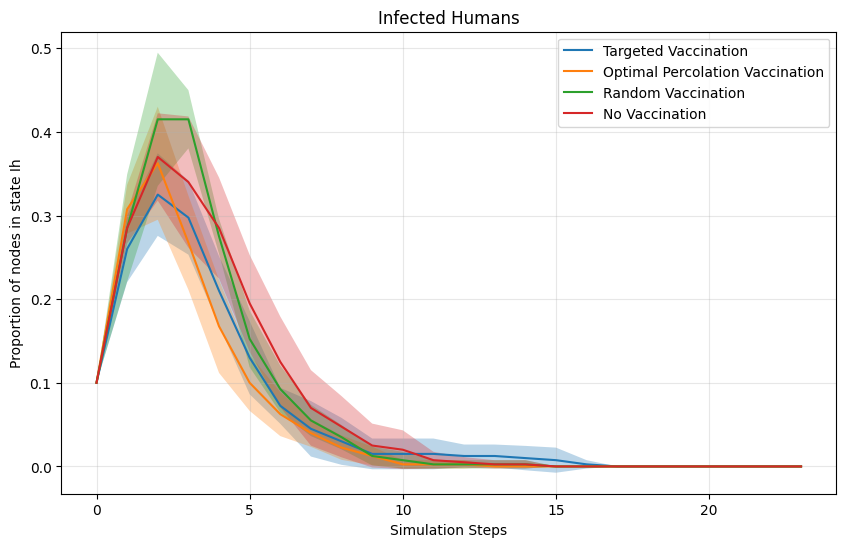

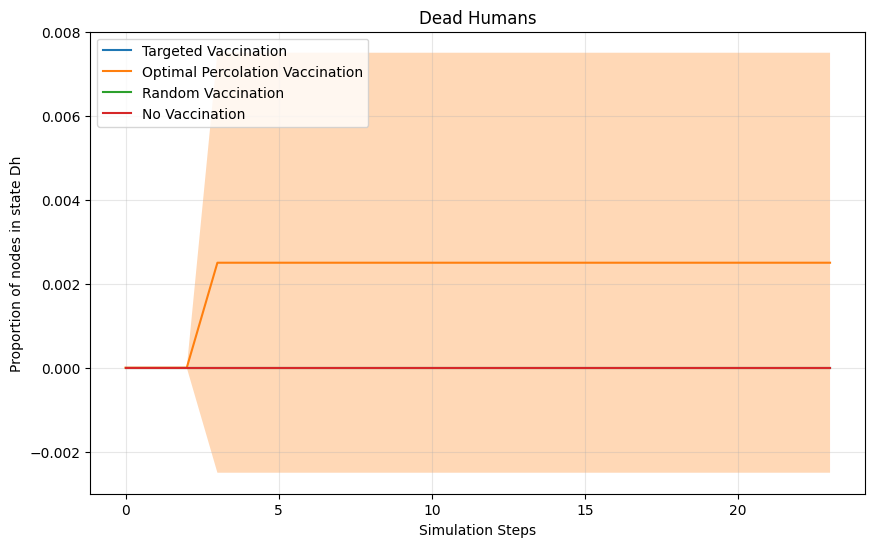

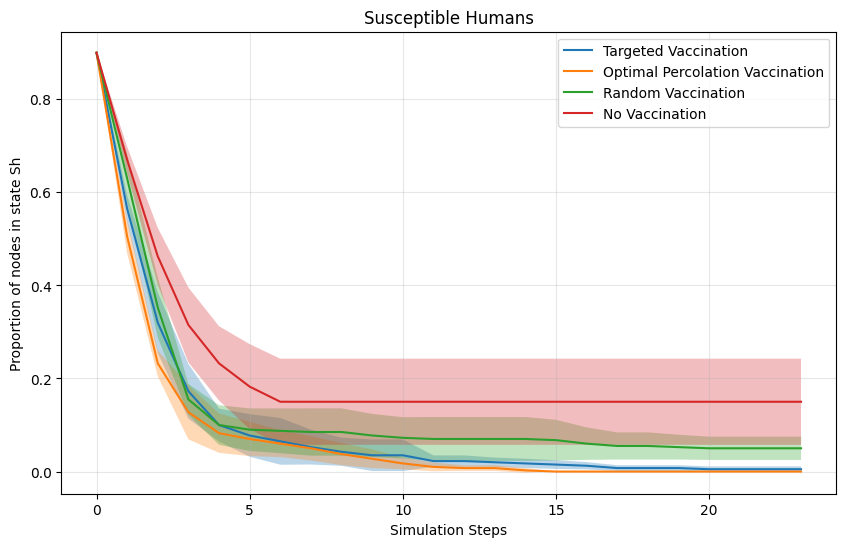

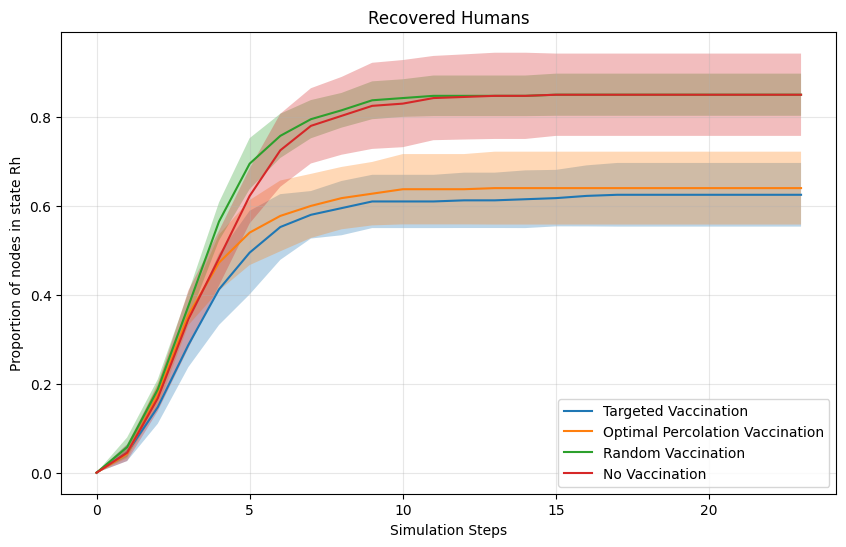

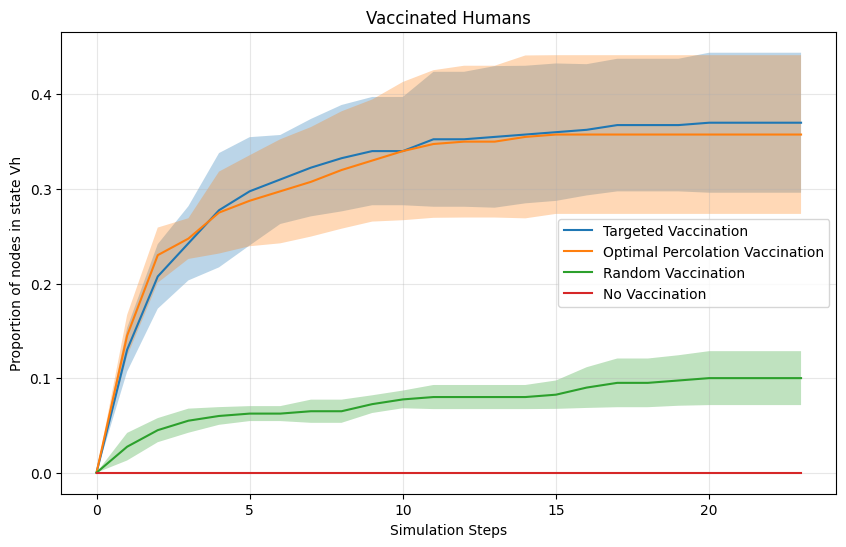

In [ ]:
#@title SIRVD Model Visualization { display-mode: "form" }
#@markdown ### Select states and vaccination strategies to visualize

#@markdown ## Select states to plot
plot_infected = True #@param {type:"boolean"}
plot_dead = True #@param {type:"boolean"}
plot_susceptible = True #@param {type:"boolean"}
plot_recovered = True #@param {type:"boolean"}
plot_vaccinated = True #@param {type:"boolean"}

#@markdown ## Select vaccination strategies to compare
show_targeted_vaccination = True #@param {type:"boolean"}
show_random_vaccination = True #@param {type:"boolean"}
show_no_vaccination = True #@param {type:"boolean"}

import matplotlib.pyplot as plt
from collections import Counter
import os

# Map selections to state codes
states_to_plot = []
if plot_infected:
    states_to_plot.append("Ih")
if plot_dead:
    states_to_plot.append("Dh")
if plot_susceptible:
    states_to_plot.append("Sh")
if plot_recovered:
    states_to_plot.append("Rh")
if plot_vaccinated:
    states_to_plot.append("Vh")

# Map selections to strategy keys
strategies_to_plot = []
if show_targeted_vaccination:
    strategies_to_plot.append("vax_target")
    strategies_to_plot.append("vax_percolation")
if show_random_vaccination:
    strategies_to_plot.append("vax")
if show_no_vaccination:
    strategies_to_plot.append("no_vax")

# Verify we have at least one state and strategy selected
if not states_to_plot:
    print("Error: Please select at least one state to plot")

if not strategies_to_plot:
    print("Error: Please select at least one vaccination strategy")

import numpy as np

if states_to_plot and strategies_to_plot:
    # Create dictionary to store data for plotting
    to_plot_strategies = {}

    # Process data from simulations
    for strategy, sims_type in sims.items():
        if strategy not in strategies_to_plot:
            continue

        # For each state, collect proportions across runs and steps
        temp = {st: [] for st in states_to_plot}

        for i, sim in sims_type.items():  # Loop over each simulation run
            # Collect proportions for this run
            run_props = {st: [] for st in states_to_plot}
            for step in range(steps):
                states = sim.state(step=step)
                count_states = Counter(states.values())
                den = sum(count_states.values())
                for st in states_to_plot:
                    run_props[st].append(count_states.get(st, 0) / den if den > 0 else 0)
            # Append run's data to temp
            for st in states_to_plot:
                temp[st].append(run_props[st])

        # Convert lists of lists to numpy arrays for easier stats: shape (nsims, steps)
        for st in states_to_plot:
            temp[st] = np.array(temp[st])

        to_plot_strategies[strategy] = temp

    # Create plots
    for st in states_to_plot:
        fig = plt.figure(figsize=(10, 6))
        title = {
            "Ih": "Infected Humans",
            "Dh": "Dead Humans",
            "Rh": "Recovered Humans",
            "Sh": "Susceptible Humans",
            "Vh": "Vaccinated Humans"
        }.get(st, st)

        plt.title(title)

        # Plot mean ± std for each strategy
        for strategy in strategies_to_plot:
            if strategy in to_plot_strategies and st in to_plot_strategies[strategy]:
                data = to_plot_strategies[strategy][st]
                mean_vals = data.mean(axis=0)
                std_vals = data.std(axis=0)

                label = {
                    "vax_target": "Targeted Vaccination",
                    "vax_percolation": "Optimal Percolation Vaccination",
                    "vax": "Random Vaccination",
                    "no_vax": "No Vaccination"
                }.get(strategy, strategy)

                steps_range = range(data.shape[1])
                plt.plot(steps_range, mean_vals, label=label)
                plt.fill_between(steps_range, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3)

        plt.xlabel("Simulation Steps")
        plt.ylabel(f"Proportion of nodes in state {st}")
        plt.legend()
        plt.grid(True, alpha=0.3)
        fig.savefig(os.path.join(cwd, f"{title}_{net}.pdf"), dpi=600)
        plt.show()


# Hide the code
from IPython.display import display, HTML
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))


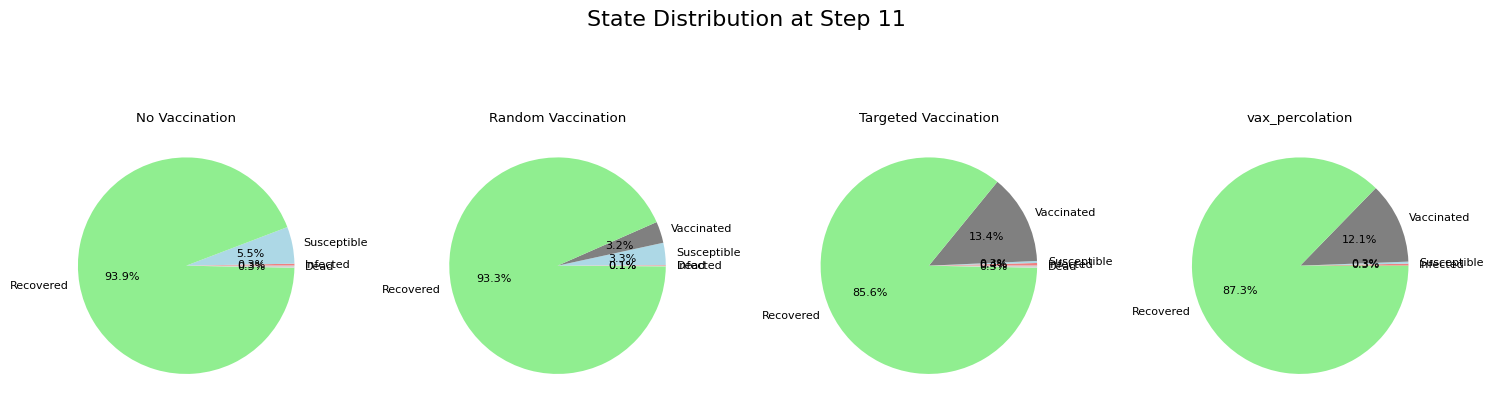

Selected step 11 for training
State distribution at this step:

no_vax:
  Infected: 3 nodes (0.3%)
  Susceptible: 53 nodes (5.5%)
  Vaccinated: 0 nodes (0.0%)
  Recovered: 905 nodes (93.9%)
  Dead: 3 nodes (0.3%)

vax:
  Infected: 1 nodes (0.1%)
  Susceptible: 32 nodes (3.3%)
  Vaccinated: 31 nodes (3.2%)
  Recovered: 899 nodes (93.3%)
  Dead: 1 nodes (0.1%)

vax_target:
  Infected: 4 nodes (0.4%)
  Susceptible: 3 nodes (0.3%)
  Vaccinated: 129 nodes (13.4%)
  Recovered: 825 nodes (85.6%)
  Dead: 3 nodes (0.3%)

vax_percolation:
  Infected: 3 nodes (0.3%)
  Susceptible: 3 nodes (0.3%)
  Vaccinated: 117 nodes (12.1%)
  Recovered: 841 nodes (87.2%)
  Dead: 0 nodes (0.0%)


In [31]:
#@title Select Simulation Step for Training { display-mode: "form" }
#@markdown ### Select a specific simulation step to use for training



idx = 1 #@param {type:"slider", min:1, max:4, step:1}
#@markdown ## Select simulation index

train_step = 11 #@param {type:"slider", min:1, max:100, step:1}
#@markdown Select which simulation states to display

show_infected = True #@param {type:"boolean"}
show_susceptible = True #@param {type:"boolean"}
show_vaccinated = True #@param {type:"boolean"}
show_recovered = True #@param {type:"boolean"}
show_dead = True #@param {type:"boolean"}
save = False #@param {type:"boolean"}

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from IPython.display import display, HTML

# Setup
states_to_show = []
if show_infected: states_to_show.append("Ih")
if show_susceptible: states_to_show.append("Sh")
if show_vaccinated: states_to_show.append("Vh")
if show_recovered: states_to_show.append("Rh")
if show_dead: states_to_show.append("Dh")

state_names = {
    "Ih": "Infected",
    "Sh": "Susceptible",
    "Vh": "Vaccinated",
    "Rh": "Recovered",
    "Dh": "Dead"
}

'''
color_map = {
    "Ih": "red",
    "Sh": "blue",
    "Eh": "orange",
    "Rh": "green",
    "Dh": "black"
}
'''

color_map = {
    "Ih": "lightcoral",
    "Sh": "lightblue",
    "Eh": "peachpuff",
    "Rh": "lightgreen",
    "Dh": "lightgray"
}

if N_SIMS == 1:
  sims_to_use = {type: sim[0] for type, sim in sims.items()}
else:
  sims_to_use = {type: sim[idx] for type, sim in sims.items()}


fig, ax = plt.subplots(1, len(sims_to_use), figsize=(15, 5), sharey=True)
fig.suptitle(f'State Distribution at Step {train_step}', fontsize=16)

summary_by_strategy = {}

for i, (type_name, sim) in enumerate(sims_to_use.items()):
    states = sim.state(step=train_step)
    count_states = Counter(states.values())
    total = sum(count_states.values())

    labels, values, colors = [], [], []

    strategy_label = {
        "vax_target": "Targeted Vaccination",
        "vax": "Random Vaccination",
        "no_vax": "No Vaccination"
    }.get(type_name, type_name)

    strategy_data = {}

    for state in states_to_show:
        if state in count_states:
            label = state_names.get(state, state)
            count = count_states[state]
            perc = round(count / total * 100, 1)

            labels.append(label)
            values.append(perc)
            colors.append(color_map.get(state, "gray"))


            strategy_data[label] = {
                "nodes": count,
                "percentage": perc
            }


    summary_by_strategy[strategy_label] = strategy_data

    # Pie chart
    ax[i].pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
    ax[i].set_title(strategy_label)

plt.tight_layout()
if save:
  fig.savefig(os.path.join(cwd, f"states_step_{train_step}_{net}.pdf"), dpi=600)
plt.show()


if save:
  json_path = os.path.join(cwd, f"state_distribution_step_{train_step}_{net}.json")
  with open(json_path, "w") as f:
      json.dump(summary_by_strategy, f, indent=4)

  print(f"\n State distribution saved to {json_path}")



# Print state percentages
print(f"Selected step {train_step} for training")
print("State distribution at this step:")

for sim_name, sim in sims_to_use.items():
    states = sim.state(step=train_step)
    count_states = Counter(states.values())
    total = sum(count_states.values())

    print(f"\n{sim_name}:")
    for state in states_to_show:
        count = count_states.get(state, 0)
        percent = count / total * 100 if total > 0 else 0
        print(f"  {state_names[state]}: {count} nodes ({percent:.1f}%)")


display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))

GCN part: predict next simulation step with k-GCN

no_vax class distribution: [  3   3 905  53]
vax class distribution: [  1   1 899  32  31]
Stratified split disabled for 'vax': at least one class has less than 2 samples.
vax_target class distribution: [  3   4 825   3 129]
vax_percolation class distribution: [  3 841   3 117]
Training on no_vax data with 4 classes
Device: cpu, Model: GCN with 3 input, 32 hidden, 16 output channels
Training for 1000 epochs with Adam optimizer (lr=0.002)
Class distribution: [  3   3 905  53]
Starting training...

Epoch 1/1000, Loss: 1.3744, Train AUC: 0.5779, Val AUC: 0.4968
Epoch 100/1000, Loss: 1.0790, Train AUC: 0.7492, Val AUC: 0.7143
Epoch 200/1000, Loss: 0.9740, Train AUC: 0.8466, Val AUC: 0.8573
Epoch 300/1000, Loss: 0.8810, Train AUC: 0.8914, Val AUC: 0.9227
Epoch 400/1000, Loss: 0.8609, Train AUC: 0.8922, Val AUC: 0.9324
Epoch 500/1000, Loss: 0.8587, Train AUC: 0.8930, Val AUC: 0.9350
Epoch 600/1000, Loss: 0.8578, Train AUC: 0.8931, Val AUC: 0.9376
Epoch 700/1000, Loss: 0.8573, Train AUC: 0.89

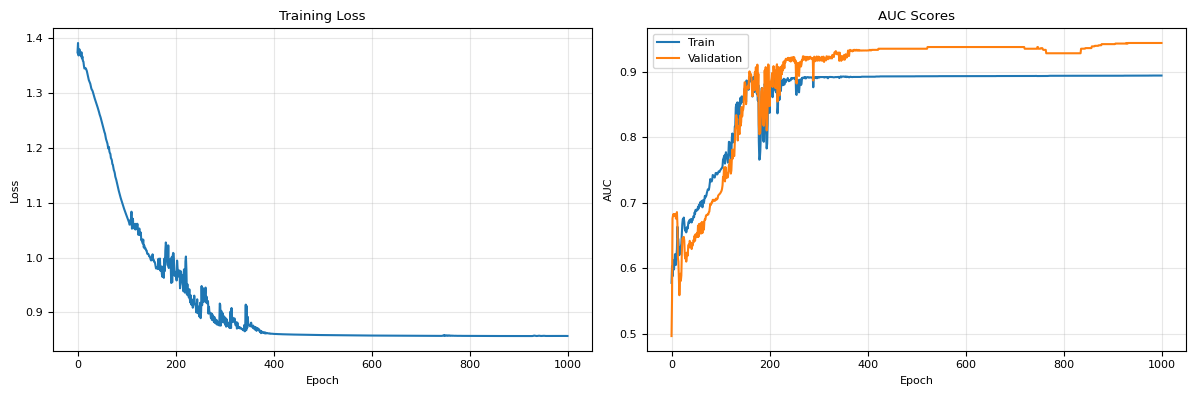


Class-wise AUC scores (validation set):
Dh: 1.0000 (samples: 1)
Ih: 0.7751 (samples: 1)
Rh: 0.9998 (samples: 272)
Sh: 1.0000 (samples: 16)

Final model node embeddings:


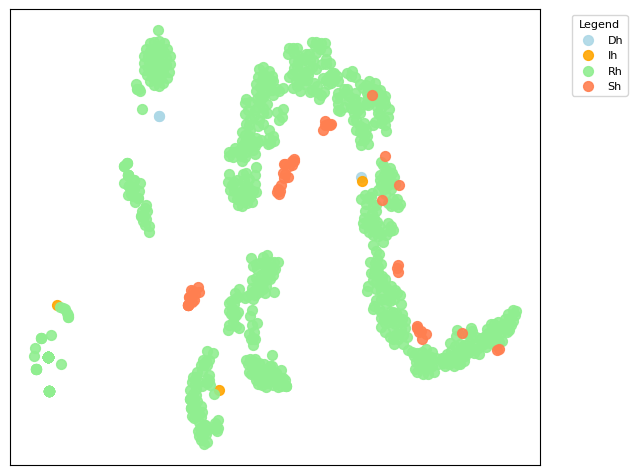

In [32]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import time
from IPython.display import Javascript  # Restrict height of output cell.
from sklearn.metrics import roc_auc_score
from torch_geometric.data import Data

# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from umap import UMAP
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import numpy as np

import scipy
import sklearn
np.__version__, scipy.__version__, sklearn.__version__

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def parse_edges(edge_list):

    source_nodes = []
    target_nodes = []
    node_mapping = {}
    next_index = 0

    for edge in edge_list:
        source, target = edge
        #if source == target:
        #    continue
        if source not in node_mapping:
            node_mapping[source] = next_index
            next_index += 1
        if target not in node_mapping:
            node_mapping[target] = next_index
            next_index += 1

        source_nodes.append(node_mapping[source])
        target_nodes.append(node_mapping[target])

    return source_nodes, target_nodes, node_mapping

def create_edge_index(source_nodes, target_nodes):
    edge_list = np.array([source_nodes, target_nodes], dtype=np.int64)
    edge_index = torch.LongTensor(edge_list)
    return edge_index

def labels_to_int(y):

  labels_map = {}
  labels_int = []

  uq_y = np.unique(y)

  for i, label in enumerate(uq_y):
    labels_map[label] = i

  for i, label in enumerate(y):
    labels_int.append(labels_map[label])

  return labels_int, labels_map

def create_dataloader(sim, step=-1, vax=True):
    prec_state = sim.state(step=step-1)  # Previous state
    state = sim.state(step=step)        # Current state

    # Labels (y)
    y = [label for node, label in state.items()]
    y, labels_map = labels_to_int(y)
    y = torch.tensor(y).to(device)

    # Features from previous state
    nx.set_node_attributes(sim.G, prec_state, 'prec_state')

    node_death = [1 if prec_state[node] == "Dh" else 0 for node in sim.G.nodes]
    node_death = torch.tensor(node_death).float().to(device)

    if vax:
        node_vax = [1 if prec_state[node] == "Vh" else 0 for node in sim.G.nodes]
        node_vax = torch.tensor(node_vax).float().to(device)

    # Count infected neighbors
    infected_neighbors_human = []
    for node in sim.G.nodes:
        if prec_state[node] == "Dh":
            infected_neighbors_human.append(0.0)
        else:
            neighbors = list(sim.G.neighbors(node))
            if not neighbors:
                infected_neighbors_human.append(0.0)
            else:
                infected_count = sum(1 for neighbor in neighbors if state[neighbor] == 'Ih')
                infected_neighbors_human.append(infected_count / len(neighbors))

    infected_neighbors_human = torch.tensor(infected_neighbors_human).float().to(device)

    # Encode prec_state as integers
    prec_state = list(prec_state.values())
    prec_state, _ = labels_to_int(prec_state)
    prec_state = torch.tensor(prec_state).float().to(device)

    # Build feature matrix
    if vax:
        x = torch.stack([prec_state, infected_neighbors_human, node_vax, node_death], dim=1)
    else:
        x = torch.stack([prec_state, infected_neighbors_human, node_death], dim=1)

    # Build edge_index
    edges = sim.G.edges
    source_nodes, target_nodes, node_mapping = parse_edges(edges)
    edge_index = create_edge_index(source_nodes, target_nodes)

    data = Data(x=x, edge_index=edge_index, y=y)

    return data, labels_map

# Visualization function for NX graph or PyTorch tensor
def visualize(save_info,h, colors, labels, epoch=None, loss=None, auc=None):

    #colornames = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'lime']
    colornames = [
    "lightblue",
    "orange",
    "lightgreen",
    "coral",
    "plum",
    "burlywood",
    "lightpink",
    "lightgray",
    "lemonchiffon",
    "powderblue",
    "thistle",
    "palegreen"
]

    # Create scatter plot
    fig, ax = plt.subplots()
    plt.xticks([])
    plt.yticks([])

    umap = TSNE(n_components = 2)
    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
    h = umap.fit_transform(h)


    uq_colors = np.unique(colors)
    for j, c in enumerate(uq_colors):
      indices = [i for i, color in enumerate(colors) if color == c]
      plt.scatter(h[indices, 0], h[indices, 1], s=50, label=labels[j], color = colornames[j], alpha=0.9)
      #if epoch is not None and loss is not None and auc['train'] is not None and auc['val'] is not None:
        #plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       #f'Training AUC: {auc["train"]} \n'
                       #f' Validation AUC: {auc["val"]}'),
                       #fontsize=16)

    # Adjust legend
    ax.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    fig.savefig(save_info, dpi=600)
    plt.show()

def compute_class_weights(labels):
    """
    Computes class weights based on the distribution of labels.

    :param labels: Tensor containing the class labels for each node.
    :return: A tensor containing the class weights.
    """
    # Calculate class weights using the sklearn library
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels.cpu()), y=labels.cpu().numpy())

    # Convert the weights to a tensor
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(labels.device)

    return class_weights_tensor


    print(sim_type)
    if "no_vax" in sim_type:
      vax = False
    else:
      vax = True


datas = {}
labels_maps = {}

for sim_type, sim in sims_to_use.items():
    vax = True if "no" not in sim_type else False
    data, labels_map = create_dataloader(sim, step=train_step, vax=vax)

    num_nodes = data.num_nodes
    train_size = 0.7  # 70% for training

    y_cpu = data.y.cpu().numpy()
    unique, counts = np.unique(y_cpu, return_counts=True)
    print(f"{sim_type} class distribution:", counts)

    indices = np.arange(0, num_nodes, 1)

    #If a class has less than 2 samples,  disable sratify
    if np.any(counts < 2):
        print(f"Stratified split disabled for '{sim_type}': at least one class has less than 2 samples.")
        train_indices, test_indices = train_test_split(indices, train_size=train_size, shuffle=True)
    else:
        train_indices, test_indices = train_test_split(indices, train_size=train_size, stratify=y_cpu)

    # Costruisci le maschere
    train_mask = torch.zeros(num_nodes, dtype=torch.bool).to(device)
    test_mask = torch.zeros(num_nodes, dtype=torch.bool).to(device)
    train_mask[train_indices] = True
    test_mask[test_indices] = True
    data.train_mask = train_mask
    data.test_mask = test_mask

    datas[sim_type] = data.to(device)
    labels_maps[sim_type] = labels_map

#@title Configure GNN Training Parameters { display-mode: "form" }
#@markdown ## Model Architecture
hidden_channels = 32 #@param {type:"slider", min:16, max:256, step:16}
#@markdown Size of hidden layers in the GNN

out_channels = 16 #@param {type:"slider", min:8, max:128, step:8}
#@markdown Size of output features before classification

#@markdown ## Training Parameters
learning_rate = 0.002 #@param {type:"number"}
num_epochs = 1000 #@param {type:"slider", min:10, max:10000, step:10}

#@markdown ## Visualization Options
show_umap_during_training = True #@param {type:"boolean"}
#@markdown Whether to show UMAP plots during training

umap_frequency = 100 #@param {type:"slider", min:1, max:1000, step:1}
#@markdown Show UMAP visualization every N epochs

#@markdown ## Select Simulation
simulation_to_train = "no_vax" #@param ["no_vax", "vax", "vax_target", "vax_percolation"]
#@markdown Which simulation data to use for training



gnn_training_params = {
    "Model Architecture": {
        "hidden_channels": hidden_channels,
        "out_channels": out_channels
    },
    "Training": {
        "learning_rate": learning_rate,
        "num_epochs": num_epochs
    },
    "Simulation": {
        "simulation_to_train": simulation_to_train
    }
}


with open(os.path.join(cwd,f"gnn_config_{simulation_to_train}_{selected_model}.json"), "w") as f:
    json.dump(gnn_training_params, f, indent=4)



import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GraphConv
from torch_geometric.data import Data
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.metrics import roc_auc_score
import numpy as np
from IPython.display import display, HTML, clear_output

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Get the selected data
data = datas[simulation_to_train].to(device)
labels_map = labels_maps[simulation_to_train]

# Determine input channels from data
in_channels = data.x.shape[1]

# Reverse the labels map for interpretation
reverse_labels_map = {v: k for k, v in labels_map.items()}

# Define the GNN model as in the original code
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_channels, hidden_channels)
        self.conv2 = GraphConv(hidden_channels, hidden_channels)
        self.linear = nn.Linear(hidden_channels, out_channels)
        self.classifier = nn.Linear(out_channels, num_classes)

    def forward(self, x, edge_index, edge_weight=None):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.linear(x)
        x = F.relu(x)
        x = self.classifier(x)  # Output for the classes
        x = F.softmax(x, dim=1)
        return x

    # Method to get embeddings for visualization
    def get_embeddings(self, x, edge_index, edge_weight=None):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.linear(x)
        x = F.relu(x)
        return x

# Count number of classes
num_classes = len(torch.unique(data.y))

# Initialize the model
model = GCN(in_channels=in_channels,
            hidden_channels=hidden_channels,
            out_channels=out_channels,
            num_classes=num_classes).to(device)

# Set up optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Calculate class weights for imbalanced data
class_weights = compute_class_weights(data.y)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Training loop
train_losses = []
train_aucs = []
val_aucs = []

print(f"Training on {simulation_to_train} data with {num_classes} classes")
print(f"Device: {device}, Model: GCN with {in_channels} input, {hidden_channels} hidden, {out_channels} output channels")
print(f"Training for {num_epochs} epochs with Adam optimizer (lr={learning_rate})")
print(f"Class distribution: {np.bincount(data.y.cpu().numpy())}")
print("Starting training...\n")

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    out = model(data.x, data.edge_index)

    # Compute loss on training nodes
    loss = criterion(out[data.train_mask], data.y[data.train_mask])

    # Backward pass
    loss.backward()
    optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)

        # Get embeddings for visualization
        h = model.get_embeddings(data.x, data.edge_index)

        # Calculate AUC scores with one-hot encoding
        y_true_train = F.one_hot(data.y[data.train_mask], num_classes).float()
        y_pred_train = out[data.train_mask]

        y_true_val = F.one_hot(data.y[data.test_mask], num_classes).float()
        y_pred_val = out[data.test_mask]

        # Calculate AUC for each class and average (macro)
        train_auc = roc_auc_score(y_true_train.cpu(), y_pred_train.cpu(), multi_class='ovr', average='macro')
        val_auc = roc_auc_score(y_true_val.cpu(), y_pred_val.cpu(), multi_class='ovr', average='macro')

        train_losses.append(loss.item())
        train_aucs.append(train_auc)
        val_aucs.append(val_auc)

    # Print results
    if (epoch + 1) % 100 == 0 or epoch == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train AUC: {train_auc:.4f}, Val AUC: {val_auc:.4f}')
    '''
    # Show UMAP visualization if enabled
    if show_umap_during_training and (epoch + 1) % umap_frequency == 0:
        if epoch > 0:  # Don't clear on first epoch
            clear_output(wait=True)
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train AUC: {train_auc:.4f}, Val AUC: {val_auc:.4f}')

        # Use visualize function
        colors = data.y.cpu().numpy()
        label_names = [reverse_labels_map.get(i, f"Class {i}") for i in range(num_classes)]
        auc_dict = {"train": train_auc, "val": val_auc}
        visualize(h, colors, label_names, epoch+1, loss, auc_dict)
    '''

# Plot final training curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(train_aucs, label='Train')
plt.plot(val_aucs, label='Validation')
plt.title('AUC Scores')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Final evaluation
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
    h = model.get_embeddings(data.x, data.edge_index)

    # Print class-wise performance
    print("\nClass-wise AUC scores (validation set):")
    y_true_val = F.one_hot(data.y[data.test_mask], num_classes).float().cpu().numpy()
    y_pred_val = out[data.test_mask].cpu().numpy()

    for i in range(num_classes):
        class_name = reverse_labels_map.get(i, f"Class {i}")
        num_samples = np.sum(y_true_val[:, i])

        try:
            if num_samples > 0:
                class_auc = roc_auc_score(y_true_val[:, i], y_pred_val[:, i])
                print(f"{class_name}: {class_auc:.4f} (samples: {int(num_samples)})")
            else:
                print(f"{class_name}: No samples in validation set")
        except:
            print(f"{class_name}: Not enough samples for AUC calculation")

    # Final UMAP visualization
    print("\nFinal model node embeddings:")
    colors = data.y.cpu().numpy()
    label_names = [reverse_labels_map.get(i, f"Class {i}") for i in range(num_classes)]
    auc_dict = {"train": train_aucs[-1], "val": val_aucs[-1]}
    visualize(os.path.join(cwd, f"final_node_emb_{net}_{simulation_to_train}.pdf"), h, colors, label_names, num_epochs, torch.tensor(train_losses[-1]), auc_dict)

# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))


Classes: ['Ih', 'Rh', 'Sh', 'Vh']
Classification Report:
              precision    recall  f1-score   support

          Ih       0.61      0.78      0.68        18
          Rh       0.96      0.76      0.85        29
          Sh       0.50      0.60      0.55         5
          Vh       0.96      0.96      0.96        28

    accuracy                           0.82        80
   macro avg       0.76      0.78      0.76        80
weighted avg       0.85      0.82      0.83        80



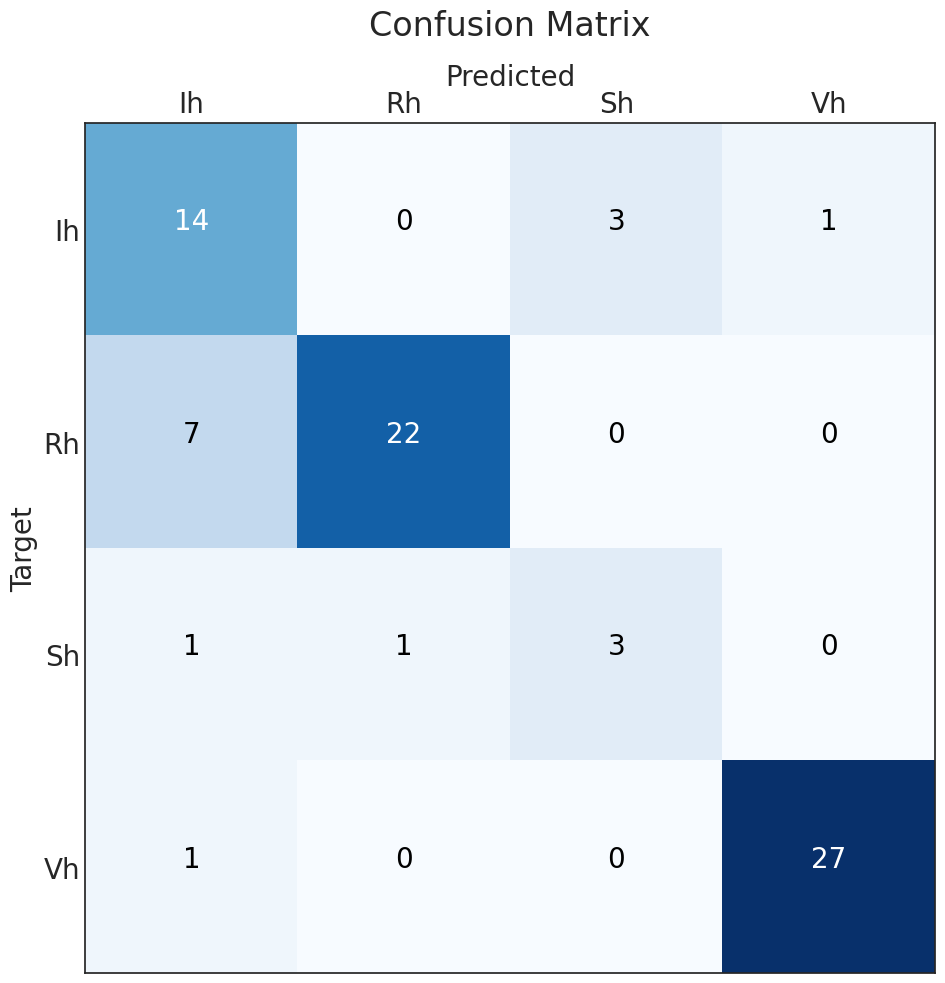

Accuracy: 0.8250
Macro F1 Score: 0.7597
Macro Sensitivity (Recall): 0.7752
Macro Precision: 0.7574


Generating Integrated Gradients explanations for class: Ih
0 Ih (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
1 Rh (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
2 Sh (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)
3 Vh (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)


/usr/local/lib/python3.12/dist-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


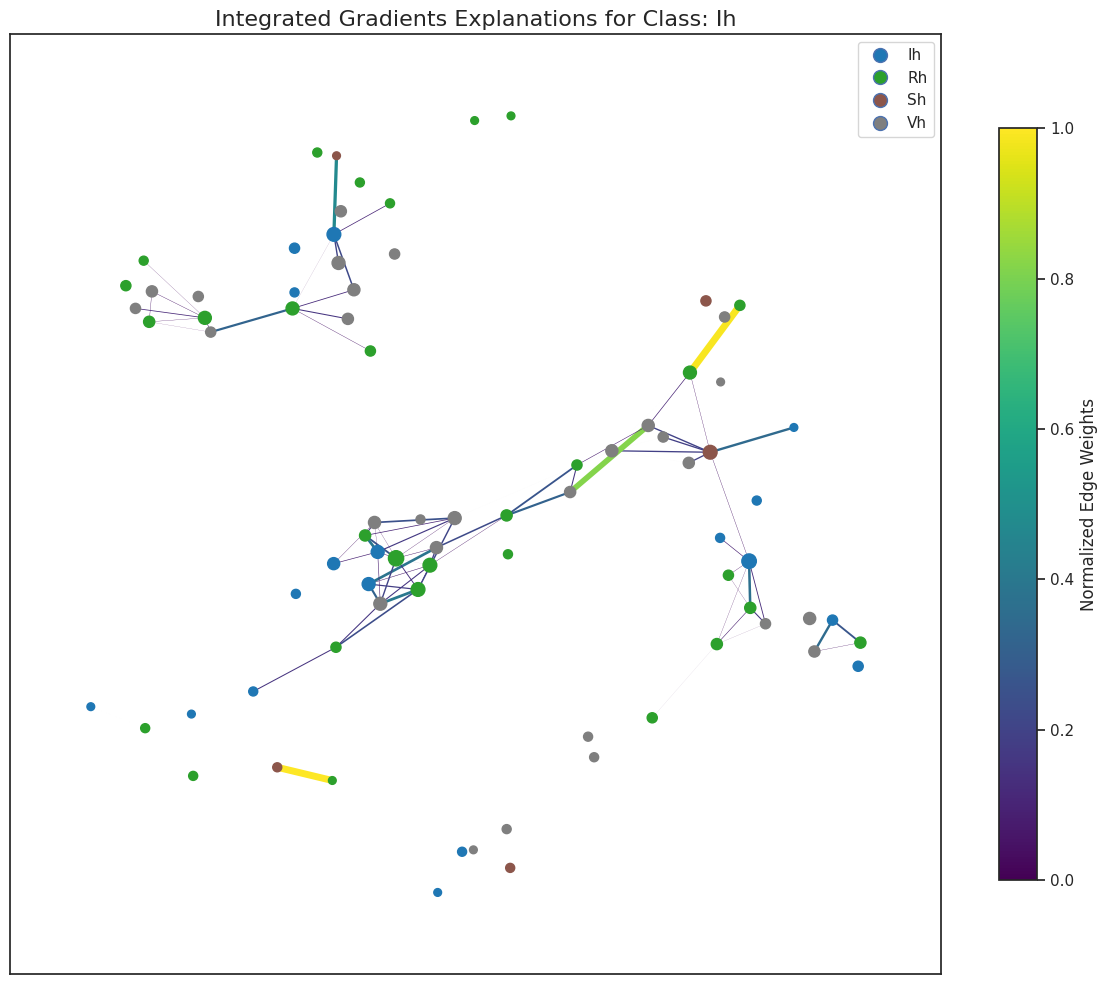

In [ ]:
#@title Model Evaluation and Visualization { display-mode: "form" }
#@markdown ## Select what you want to visualize

#@markdown ### Model Performance Visualization
show_confusion_matrix = True #@param {type:"boolean"}
show_classification_report = True #@param {type:"boolean"}

#@markdown ### Captum Model Explanations
perform_captum_explanations = True #@param {type:"boolean"}

#@markdown #### Explanation Method
explanation_method = "Integrated Gradients" #@param ["Integrated Gradients", "Saliency"]

#@markdown #### Target Class to Explain
#@markdown Select which class to explain (0-based index)
target_class = 0 #@param {type:"slider", min:0, max:5, step:1}

#@markdown ### Network Visualization
visualize_network = True #@param {type:"boolean"}
show_edge_weights = True #@param {type:"boolean"}
node_size_factor = 100 #@param {type:"slider", min:50, max:1000, step:10}

from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    # roc_auc_score, # Removed due to persistent error
    classification_report,
    confusion_matrix,
    accuracy_score
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import torch
from captum.attr import Saliency, IntegratedGradients
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import cm
from collections import defaultdict
from IPython.display import display, HTML
import itertools

# Function to test the model
def test(data):
    model.eval()
    optimizer.zero_grad()  # Clear gradients
    out = model(data.x, data.edge_index)  # Perform a single forward pass
    return out

# Function to plot confusion matrix
def plot_cm(filename, cm, classes):
    sns.set(style='white')
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.imshow(cm, cmap="Blues")
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=20, length=0)

    ax.set_title('Confusion Matrix', size=24, pad=20)
    ax.set_xlabel('Predicted', size=20)
    ax.set_ylabel('Target', size=20)

    nclasses = len(classes)
    ticks = np.arange(0, nclasses, 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", size=20,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    fig.savefig(os.path.join(cwd, filename), dpi=600)
    plt.show()

# Function to validate model for multi-class
def validate_model_multiclass(y_trues, y_preds, label_names=None):
    # Convert raw predictions to class predictions
    y_preds_softmax = torch.softmax(y_preds, dim=1)
    predicted_classes = torch.argmax(y_preds_softmax, dim=1).cpu().detach().numpy()

    y_trues_numpy = y_trues.long().cpu().detach().numpy()
    y_preds_numpy = y_preds_softmax.cpu().detach().numpy()

    acc = accuracy_score(y_trues_numpy, predicted_classes)
    f1 = f1_score(y_trues_numpy, predicted_classes, average="macro")
    sensitivity = recall_score(y_trues_numpy, predicted_classes, average="macro")
    precision = precision_score(y_trues_numpy, predicted_classes, average="macro")

    # roc_auc_score for multiclass with 'ovr' expects 1D y_true and 2D y_score
    # Removed due to persistent error:
    try:
        auc = roc_auc_score(y_trues_numpy, y_preds_numpy, multi_class="ovr", average="macro")
    except ValueError as e:
         print(f"Could not compute ROC AUC: {e}")
         auc = np.nan # Assign NaN if calculation fails


    if label_names is None:
        label_names = [f"Class {i}" for i in range(np.max(y_trues_numpy) + 1)]

    # Show classification report if requested
    if show_classification_report:
        cr = classification_report(y_trues_numpy, predicted_classes, target_names=label_names)
        print("Classification Report:")
        print(cr)
        with open(os.path.join(cwd, f"class_report{net}_{simulation_to_train}.json"), "w") as f:
            f.write("Classification Report:\n")
            f.write(cr)


    # Show confusion matrix if requested
    if show_confusion_matrix:
        cm = confusion_matrix(y_trues_numpy, predicted_classes)
        plot_cm(f"confusion_matrix_{net}_{simulation_to_train}.pdf",cm, label_names)

    # Generate summary string
    summary = (
        f"Accuracy: {acc:.4f}\n"
        f"Macro F1 Score: {f1:.4f}\n"
        f"Macro Sensitivity (Recall): {sensitivity:.4f}\n"
        f"Macro Precision: {precision:.4f}\n"
        #f"ROC AUC (macro): {auc:.4f}\n" # Removed from summary
    )

    print(summary)
    # Return metrics excluding AUC for now
    return [acc, f1, sensitivity, precision], summary

# Forward function for Captum explanations
def model_forward(edge_mask, data):
    out = model.forward(data.x, data.edge_index, edge_mask)
    return out

# Function to explain model predictions
def explain(method, data, target=0):
    input_mask = torch.ones(data.edge_index.shape[1]).requires_grad_(True).to(device)

    if method == 'ig' or method == 'Integrated Gradients':
        ig = IntegratedGradients(model_forward)
        mask = ig.attribute(input_mask, target=target,
                            additional_forward_args=(data,),
                            internal_batch_size=data.edge_index.shape[1])
    elif method == 'saliency' or method == 'Saliency':
        saliency = Saliency(model_forward)
        mask = saliency.attribute(input_mask, target=target,
                                  additional_forward_args=(data,))
    else:
        raise Exception('Unknown explanation method')

    edge_mask = np.abs(mask.cpu().detach().numpy())
    if edge_mask.max() > 0:  # avoid division by zero
        edge_mask = edge_mask / edge_mask.max()
    return edge_mask

# Function to aggregate edge directions
def aggregate_edge_directions(edge_mask, data):
    edge_mask_dict = defaultdict(float)
    for val, u, v in list(zip(edge_mask, *data.edge_index)):
        u, v = u.item(), v.item()
        if u > v:
            u, v = v, u
        edge_mask_dict[(u, v)] += val
    return edge_mask_dict

# Function to draw network with explanations
def visualize_network_with_explanations(data, G, method, edge_mask_dict, title):
    from matplotlib.lines import Line2D
    # Normalize weights for visualization
    if edge_mask_dict:
        max_weight = max(edge_mask_dict.values())
        normalized_weights = {edge: weight / max_weight for edge, weight in edge_mask_dict.items()}
    else:
        normalized_weights = {}

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(title, fontsize=16)

    # Use a layout that ensures good separation between nodes
    pos = nx.spring_layout(G, seed=seed, k=2/np.sqrt(G.number_of_nodes()))

    # Draw edges with thickness proportional to weights if show_edge_weights is True
    if show_edge_weights and normalized_weights:
        edges, weights = zip(*normalized_weights.items())
        nx.draw_networkx_edges(G, pos,
                              edgelist=edges,
                              width=[5 * w for w in weights],
                              edge_color=weights,
                              edge_cmap=cm.viridis)
    else:
        nx.draw_networkx_edges(G, pos, alpha=0.3)

    # Draw nodes with sizes proportional to their degree
    node_sizes = [20 + node_size_factor * G.degree(n) / max(dict(G.degree()).values()) for n in G.nodes()]

    # Get node colors from class labels
    node_colors = data.y.cpu().detach().numpy()
    node_colors = [cm.tab10(i/ len(torch.unique(data.y))) for i in node_colors]
    nx.draw_networkx_nodes(G, pos,
                          node_size=node_sizes,
                          node_color=node_colors,
                          cmap=cm.tab10)

    # Add labels to nodes if there aren't too many
    #if len(G.nodes()) < 100:
    #    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

    # Add a color bar for edge weights if showing weights
    if show_edge_weights and normalized_weights:
        plt.colorbar(plt.cm.ScalarMappable(cmap=cm.viridis),
                    label="Normalized Edge Weights",
                    shrink=0.8, ax=ax)

    patches = []
    unique_y = torch.unique(data.y)
    label_names = list(labels_maps[simulation_to_train].keys())
    for i in range(len(unique_y)):
        label = label_names[i]
        color = cm.tab10(i/ len(unique_y))
        print(i, label, color)
        patches.append(Line2D([0], [0], label=label, marker='o', markersize=10, markerfacecolor=color, linestyle=''))

    plt.legend(handles = patches)
    plt.tight_layout()
    fig.savefig(os.path.join(cwd, f"xai{net}_{method}_{simulation_to_train}.pdf"), dpi=600)
    plt.show()

# Get data for evaluation
data = datas[simulation_to_train].to(device)
model.to(device)

# Generate predictions
y_pred = test(data)
y_test = data.y

# Get label names
try:
    label_names = list(labels_maps[simulation_to_train].keys())
    print(f"Classes: {label_names}")
except:
    label_names = [f"Class {i}" for i in range(len(torch.unique(y_test)))]
    print(f"Using default class names: {label_names}")

# Evaluate model performance
# Pass y_test (1D tensor) and y_pred (2D tensor of probabilities)
metrics, _ = validate_model_multiclass(y_test, y_pred, label_names=label_names)

# Perform Captum explanations if requested
if perform_captum_explanations:

    #target_class = 1 #Ih
    print(f"\nGenerating {explanation_method} explanations for class: {label_names[target_class]}")

    # Check that target class is valid
    if target_class >= len(label_names):
        print(f"Warning: Target class index {target_class} is out of bounds. Using class 0 instead.")
        target_class = 0

    # Get method name in format expected by explain function
    method_name = 'ig' if explanation_method == "Integrated Gradients" else 'saliency'

    # Compute masks and aggregate
    edge_mask = explain(method_name, data, target=target_class)
    edge_mask_dict = aggregate_edge_directions(edge_mask, data)

    # Visualize network with explanations if requested
    if visualize_network:
        try:
            G = simulation_to_train.G  # Try to get the graph from simulation
        except:
            # Create a networkx graph from the edge_index
            G = nx.Graph()
            edge_index = data.edge_index.cpu().numpy()
            for i in range(edge_index.shape[1]):
                G.add_edge(edge_index[0, i], edge_index[1, i])

        visualize_network_with_explanations(
            data,
            G, method_name,
            edge_mask_dict,
            f"{explanation_method} Explanations for Class: {label_names[target_class]}"
        )

# Hide the code
display(HTML('''
<script>
var cell = document.querySelector('.input');
if (cell) cell.style.display = 'none';
</script>
'''))

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

#@title Node-level state probabilities { display-mode: "form" }
#@markdown ## Select the node you want to predict probabilities
idx = 33 #@param {type:"slider", min:0, max:100, step:1}

pred = y_pred[idx].cpu().detach().numpy()
df_pred = pd.DataFrame(columns = labels_map)
df_pred.loc[idx] = list(pred)
df_pred.T

,33
Ih,0.000061
Rh,0.999701
Sh,0.000237
Vh,0.000000


Computation of edge importance with Integrated Gradientsfor target class '0'
97 most influential edges removed (top 70%)
 Step 0: {'Sh': 72, 'Ih': 8, 'Rh': 0, 'Vh': 0, 'Dh': 0}

/tmp/ipython-input-1598963209.py:229: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  self._cmap = plt.cm.get_cmap('tab20') # Matplotlib colormap for node color coding


 Step 0: {'Sh': 72, 'Ih': 8, 'Rh': 0, 'Vh': 0, 'Dh': 0}

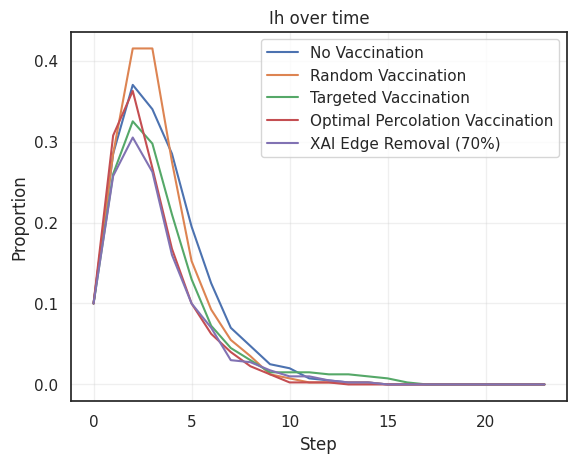

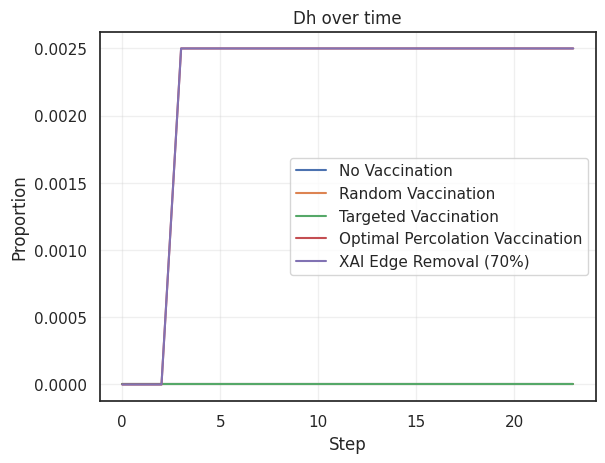

,Strategy,Peak Infected,Total Dead,Duration
0,No Vaccination,37.00%+-0.12,0.00%+-0.0,15
1,Random Vaccination,41.50%+-0.13,0.00%+-0.0,15
2,Targeted Vaccination,32.50%+-0.1,0.00%+-0.0,17
3,Optimal Percolation Vaccination,36.25%+-0.1,0.25%+-0.00083,13
4,XAI Edge Removal (70%),30.50%+-0.092,0.25%+-0.00083,15


In [ ]:
#@title XAI experiments: remove most influent edges{ display-mode: "form" }

import torch
from collections import defaultdict


import numpy as np

import pandas as pd
# Configuration parameters
edge_removal_percentage = 70 #@param {type:"slider", min:5, max:80, step:5}
#@markdown Percentage of edges to remove
intervention_steps = steps  # Same step number of orginal simulation

# --- Step 1: Edge importance with Captum ---
print(f"Computation of edge importance with {explanation_method}for target class '{target_class}'")
edge_mask = explain('saliency' if explanation_method == "Saliency" else 'ig', data, target=target_class)
edge_mask_dict = aggregate_edge_directions(edge_mask, data)

# --- Step 2: Rimozione dei top-K% archi più influenti ---
sorted_edges = sorted(edge_mask_dict.items(), key=lambda x: x[1], reverse=True)
num_edges_to_remove = int(len(sorted_edges) * (edge_removal_percentage / 100))
edges_to_remove = [e for e, _ in sorted_edges[:num_edges_to_remove]]

if simulation_to_train == 'vax_target':

  sim = sims_to_use[simulation_to_train]
  G_modified = sim.G.copy()
  G_modified.remove_edges_from(edges_to_remove)
  print(f"{len(edges_to_remove)} most influential edges removed (top {edge_removal_percentage}%)")

  vaccination_type = str()
  if simulation_to_train == "vax_target":
      vaccination_type = "betweenness"
  if simulation_to_train == "vax_percolation":
      vaccination_type = "optimal percolation"
  elif simulation_to_train == "vax":
      vaccination_type = "random"

  sims_explained = {}
  for i in range(N_SIMS):
      # --- Step 3: Simulation with modified graph ---
      sim_explained = Simulation(
          G_modified,
          initial_state,
          state_transition,
          sim_params[simulation_to_train],   #SIRVD parameters
          vaccination_type = vaccination_type,
          name="SIRVD - XAI Edge Removal"
      )
      sim_explained.run(intervention_steps)
      sims_explained[i] = sim_explained

  # --- Step 4: Adding the new simulation to the dictionary for comparison ---
  sims["explainability"] = sims_explained

  strategy_labels = {
      "no_vax": "No Vaccination",
      "vax": "Random Vaccination",
      "vax_target": "Targeted Vaccination",
      "vax_percolation": "Optimal Percolation Vaccination",
      "explainability": f"XAI Edge Removal ({edge_removal_percentage}%)"
  }

  tracked_states = ["Ih", "Dh"]
  for idx, state in enumerate(tracked_states):
      single_fig = plt.figure()
      single_ax = single_fig.add_subplot(111)

      for key in strategy_labels:
          sim_key = sims[key]
          proportions = {}
          for i in range(N_SIMS):
            sim = sim_key[i]
            proportions[i] = []
            for t in range(intervention_steps):
                state_count = Counter(sim.state(t).values())
                total = sum(state_count.values())
                proportions[i].append(state_count.get(state, 0) / total)
          mean_proportions = np.mean(list(proportions.values()), axis=0)
          single_ax.plot(mean_proportions, label=strategy_labels[key])

      single_ax.set_title(f"{state} over time")
      single_ax.set_xlabel("Step")
      single_ax.set_ylabel("Proportion")
      single_ax.legend()
      single_ax.grid(alpha=0.3)

      save_path = os.path.join(cwd, f"{state}_edge removal_({edge_removal_percentage}).pdf")
      single_fig.savefig(save_path, dpi=600)
      plt.show()


  # --- Step 6: Summary table ---
  summary_data = []
  for key in strategy_labels:
      sim_key = sims[key]
      infections = {}
      deaths = {}

      for i in range(N_SIMS):
          sim = sim_key[i]
          infections[i] = []
          deaths[i] = []
          for t in range(intervention_steps):
              state_count = Counter(sim.state(t).values())
              total = sum(state_count.values())
              infections[i].append(state_count.get("Ih", 0) / total)
              deaths[i].append(state_count.get("Dh", 0) / total)

      infections_mean = np.mean(list(infections.values()), axis=0)
      deaths_mean = np.mean(list(deaths.values()), axis=0)
      peak_infected = max(infections_mean)
      std_infected = np.std(infections_mean)
      total_dead = deaths_mean[-1]
      std_dead = np.std(deaths_mean)
      duration = next((t for t, val in enumerate(infections_mean[::-1]) if val > 0), 0)
      duration = intervention_steps - duration if duration > 0 else intervention_steps


      summary_data.append([
          strategy_labels[key],
          f"{peak_infected:.2%}+-{std_infected:.2}",
          f"{total_dead:.2%}+-{std_dead:.2}",
          duration
      ])

  df_summary = pd.DataFrame(summary_data, columns=["Strategy", "Peak Infected", "Total Dead", "Duration"])
  summary_records = df_summary.to_dict(orient="records")


  final_json = {
      "summary": summary_records,
      "removed edges": len(edges_to_remove)
  }

  with open(os.path.join(cwd, f"sirvd_summary_edge_rem_{edge_removal_percentage}.json"), "w") as f:
      json.dump(final_json, f, indent=4)

else:

  raise Exception("XAI edge computation needs to be performed on a simulation without vaccination")

#df_summary = pd.DataFrame(summary_data, columns=["Strategy", "Peak Infected", "Total Dead", "Duration"])
display(HTML("<h3>Summary: Explainability-Guided Intervention on SIRVD</h3>"))
display(df_summary)


→ Compute super-spreader with Integrated Gradients...
Graph with 80 nodes and 139 edges
→ Vaccination of top 30% most influential nodes(24 nodes)
 Step 0: {'Sh': 76, 'Ih': 1, 'Rh': 0, 'Vh': 3, 'Dh': 0}Graph with 80 nodes and 139 edges
→ Vaccination of top 30% most influential nodes(24 nodes)
 Step 0: {'Sh': 76, 'Ih': 1, 'Rh': 0, 'Vh': 3, 'Dh': 0}Graph with 80 nodes and 139 edges
→ Vaccination of top 30% most influential nodes(24 nodes)
 Step 0: {'Sh': 71, 'Ih': 1, 'Rh': 0, 'Vh': 8, 'Dh': 0}Graph with 80 nodes and 139 edges
→ Vaccination of top 30% most influential nodes(24 nodes)
 Step 0: {'Sh': 77, 'Ih': 1, 'Rh': 0, 'Vh': 2, 'Dh': 0}Graph with 80 nodes and 139 edges
→ Vaccination of top 30% most influential nodes(24 nodes)
 Step 0: {'Sh': 76, 'Ih': 1, 'Rh': 0, 'Vh': 3, 'Dh': 0}

/tmp/ipython-input-1598963209.py:229: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  self._cmap = plt.cm.get_cmap('tab20') # Matplotlib colormap for node color coding


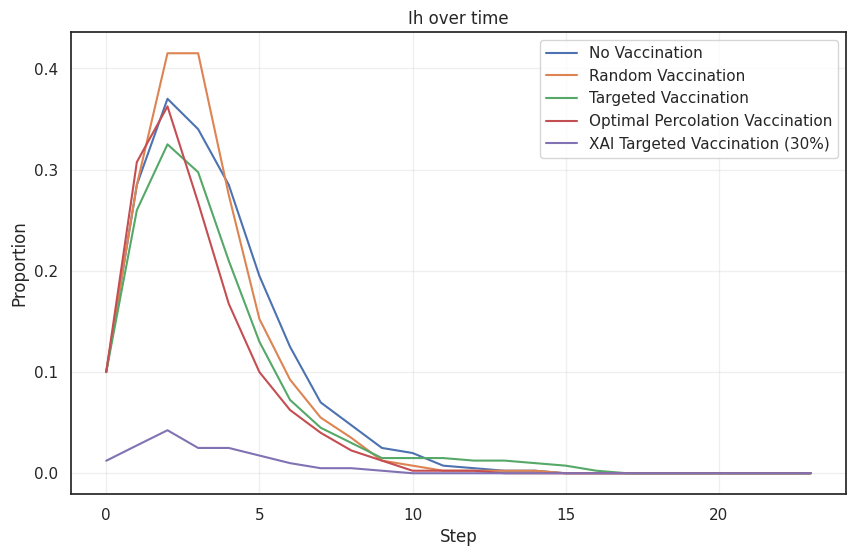

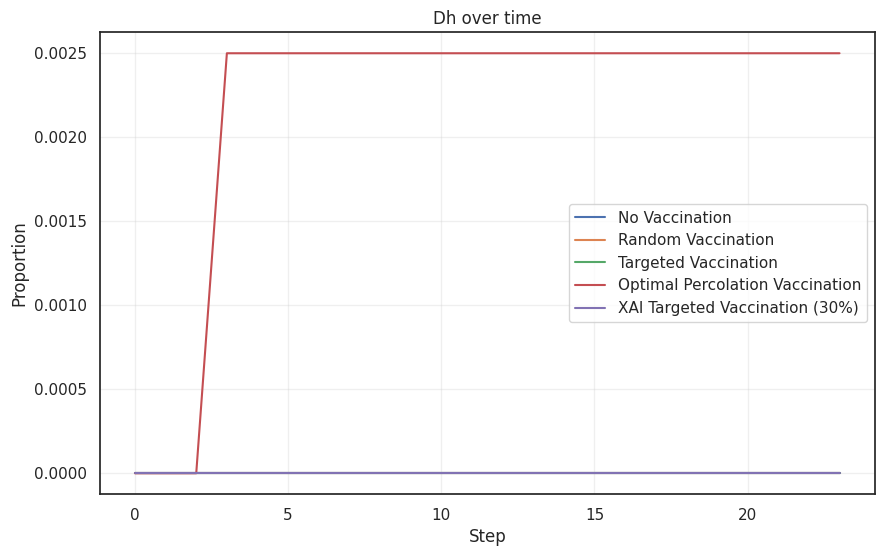

,Strategy,Peak Infected,Total Dead,Duration
0,No Vaccination,37.00%±0.12,0.00%±0.0,15
1,Random Vaccination,41.50%±0.13,0.00%±0.0,15
2,Targeted Vaccination,32.50%±0.1,0.00%±0.0,17
3,Optimal Percolation Vaccination,36.25%±0.1,0.25%±0.00083,13
4,XAI Targeted Vaccination (30%),4.25%±0.012,0.00%±0.0,10


In [ ]:
#@title XAI experiments: Targeted Vaccination { display-mode: "form" }
# Configuration parameters
top_k_percent_nodes = 30 #@param {type:"slider", min:5, max:80, step:5}
#@markdown ####Top K% most influential nodes


if simulation_to_train == "no_vax":

    # --- Step 1: Compute super-spreader with XAI  ---
    print(f"→ Compute super-spreader with {explanation_method}...")

    if 'edge_mask_dict' not in globals():
        edge_mask = explain('saliency' if explanation_method == "Saliency" else 'ig', data, target=target_class)
        edge_mask_dict = aggregate_edge_directions(edge_mask, data)

    #Compute node scores with edge contributions
    from collections import defaultdict
    node_scores = defaultdict(float)
    for (u, v), score in edge_mask_dict.items():
        node_scores[u] += score
        node_scores[v] += score

    #Selecting top K% most influential node
    sims_train = sims[simulation_to_train]

    # --- Step 2: Intial state with targeted vaccintation of super-spreader ---
    def targeted_vaccination_initial_state(G, vaccinated_nodes, p):
        state = {node: 'Sh' for node in G.nodes}
        for node in vaccinated_nodes:
          if random.random() < p:
            state[node] = 'Vh'
        #Patient zero
        susceptible_nodes = [n for n in G.nodes if state[n] == 'Sh']
        if susceptible_nodes:
            paziente_zero = random.choice(susceptible_nodes)
            state[paziente_zero] = 'Ih'
        nx.set_node_attributes(G, state, 'state')
        return state

    vaccination_type = "random"
    if simulation_to_train == "vax_target":
        vaccination_type = "betweenness"

    # --- Step 3: Simulation with targeted vaccination of super-spreader ---
    sims_explained = {}
    top_nodes = {}

    strategy_labels = {
        "no_vax": "No Vaccination",
        "vax":"Random Vaccination",
        "vax_target": "Targeted Vaccination",
        "vax_percolation": "Optimal Percolation Vaccination"
    }

    for i, sim in sims_train.items():

        print(sim.G)
        num_nodes = len(sim.G.nodes)
        #top_k_percent_nodes = 10
        top_k = int(num_nodes * top_k_percent_nodes / 100)
        top_nodes = sorted(node_scores, key=node_scores.get, reverse=True)[:top_k]

        print(f"→ Vaccination of top {top_k_percent_nodes}% most influential nodes({top_k} nodes)")

        sim_vax_explained = Simulation(
            sim.G,
            lambda G: targeted_vaccination_initial_state(G, top_nodes, BV_H),
            state_transition,
            params_vax_target,
            vaccination_type= vaccination_type,
            name="Explainability-Guided Vaccination"
        )
        sim_vax_explained.run(steps)

        sims_explained[i] = sim_vax_explained
        top_nodes[i] = top_k

    sims["vax_explained"] = sims_explained
    strategy_labels["vax_explained"] = f"XAI Targeted Vaccination ({top_k_percent_nodes}%)"

    # --- Step 4: Updating dictionaries and plots ---
    tracked_states = ["Ih", "Dh"]
    for state in tracked_states:
        proportions = {}
        fig, ax = plt.subplots(figsize=(10, 6))
        for key, sim_key in sims.items():
          if key == "explainability":
            continue
          for i, sim in sim_key.items():
              proportions[i] = []
              for t in range(steps):
                  state_count = Counter(sim.state(t).values())
                  total = sum(state_count.values())
                  proportions[i].append(state_count.get(state, 0) / total)

          mean_proportions = np.mean(list(proportions.values()), axis=0)
          ax.plot(mean_proportions, label=strategy_labels[key])

          ax.set_title(f"{state} over time")
          ax.set_xlabel("Step")
          ax.set_ylabel("Proportion")
          ax.legend()
          ax.grid(alpha=0.3)

        save_path = os.path.join(cwd, f"{state}_xai_vaccination_{top_k_percent_nodes}.pdf")
        fig.savefig(save_path, dpi=600)
        plt.show(fig)

    # --- Step 5: Tabella riepilogativa ---
    summary_data_vax = []
    for key, sims_key in sims.items():
        if key == "explainability":
           continue
        infections = {}
        deaths = {}
        for i, sim in sims_key.items():
            infections[i] = []
            deaths[i] = []
            for t in range(steps):
                state_count = Counter(sim.state(t).values())
                total = sum(state_count.values())
                infections[i].append(state_count.get("Ih", 0) / total)
                deaths[i].append(state_count.get("Dh", 0) / total)

        infections_mean = np.mean(list(infections.values()), axis=0)
        deaths_mean = np.mean(list(deaths.values()), axis=0)
        peak_infected = max(infections_mean)
        std_infected = np.std(infections_mean)
        total_dead = deaths_mean[-1]
        std_dead = np.std(deaths_mean)
        duration = next((t for t, val in enumerate(infections_mean[::-1]) if val > 0), 0)
        duration = steps - duration if duration > 0 else steps

        summary_data_vax.append([
            strategy_labels[key],
            f"{peak_infected:.2%}±{std_infected:.2}",
            f"{total_dead:.2%}±{std_dead:.2}",
            duration
        ])

    df_vax_summary = pd.DataFrame(summary_data_vax, columns=["Strategy", "Peak Infected", "Total Dead", "Duration"])
    summary_vax_records = df_vax_summary.to_dict(orient="records")

    final_json_vax = {
        "summary": summary_vax_records,
        "vaccinated": top_k
    }

    with open(os.path.join(cwd, f"sirvd_summary_targeted_{top_k_percent_nodes}.json"), "w") as f:
        json.dump(final_json_vax, f, indent=4)

else:

  raise Exception("XAI edge computation needs to be performed on a simulation without vaccination")

display(HTML("<h3>Summary: Explainability-Guided Targeted Vaccination</h3>"))
display(df_vax_summary)
